<a href="https://colab.research.google.com/github/MaluArr/Billionaires-Statistics-Dataset-2023-/blob/main/AtvParc_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Billionaires Statistics Dataset (2023)**
-------------------------------------------------------------------------------
Link: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

**Requisitos:**
- Box plot
- Histrograma
- Scatter plot
- Mapa de calor para correlação (heatmap)
- aplique a normalização em ao menos duas variáveis (colunas) do seu dataset.
- crie distribuições amostrais das médias para um evento da sua base de dados.
- encontre o Intervalo de Confiança (IC) de 90% e 95% para a média da população.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from sklearn.preprocessing import StandardScaler
from scipy import stats

#importar as libs para trabalhar com números aleatórios
from numpy.random import seed #inicializar o gerador de números aleatórios
from numpy.random import randint #retorna um número inteiro aleatório
from numpy import mean

In [2]:
from google.colab import drive
from google.colab import files
uploaded = files.upload()

Saving Billionaires Statistics Dataset.csv to Billionaires Statistics Dataset.csv


In [3]:
bili = pd.read_csv(r'Billionaires Statistics Dataset.csv',encoding='unicode_escape')

In [4]:
bili.head()

ï»¿rank  finalWorth               category                personName   age  \
0        1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1        2      180000             Automotive                 Elon Musk  51.0   
2        3      114000             Technology                Jeff Bezos  59.0   
3        4      107000             Technology             Larry Ellison  78.0   
4        5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country           gdp_country  \
0               France  ...                1.1   $2,715,518,274,227    
1        United States  ...                7.5  $21,427,700,000,000    
2        United States  ...                7.5  $21,427,700,000,000    
3        United States  ...                7.5  $21,427,700,000,000    
4        United States  ...                7.5  $21,427,700,000,000    

  gross_tertiary_education_enrollment  \
0                                65.6   
1                                88.2   
2                                88.2   
3                                88.2   
4                                88.2   

  gross_primary_education_enrollment_country life_expectancy_country  \
0                                      102.5                    82.5   
1                                      101.8                    78.5   
2                                      101.8                    78.5   
3                                      101.8                    78.5   
4                                      101.8                    78.5   

  tax_revenue_country_country total_tax_rate_country population_country  \
0                        24.2                   60.7         67059887.0   
1                         9.6                   36.6        328239523.0   
2                         9.6                   36.6        328239523.0   
3                         9.6                   36.6        328239523.0   
4                         9.6                   36.6        328239523.0   

  latitude_country longitude_country  
0        46.227638          2.213749  
1        37.090240        -95.712891  
2        37.090240        -95.712891  
3        37.090240        -95.712891  
4        37.090240        -95.712891  

[5 rows x 35 columns]

## **Tratamento de dados**

Retirar as variáveis com dados do tipo String.


In [5]:
#Remover algumas colunas para organizar meu dataset
bili.drop(['category', 'personName', 'country', 'city', 'source' , 'selfMade', 'industries', 'countryOfCitizenship', 'organization', 'residenceStateRegion',
           'state', 'title', 'firstName', 'lastName', 'status', 'gender', ], axis=1, inplace=True)

In [6]:
bili.head()

ï»¿rank  finalWorth   age       birthDate           date  birthYear  \
0        1      211000  74.0   3/5/1949 0:00  4/4/2023 5:01     1949.0   
1        2      180000  51.0  6/28/1971 0:00  4/4/2023 5:01     1971.0   
2        3      114000  59.0  1/12/1964 0:00  4/4/2023 5:01     1964.0   
3        4      107000  78.0  8/17/1944 0:00  4/4/2023 5:01     1944.0   
4        5      106000  92.0  8/30/1930 0:00  4/4/2023 5:01     1930.0   

   birthMonth  birthDay  cpi_country  cpi_change_country  \
0         3.0       5.0       110.05                 1.1   
1         6.0      28.0       117.24                 7.5   
2         1.0      12.0       117.24                 7.5   
3         8.0      17.0       117.24                 7.5   
4         8.0      30.0       117.24                 7.5   

            gdp_country  gross_tertiary_education_enrollment  \
0   $2,715,518,274,227                                  65.6   
1  $21,427,700,000,000                                  88.2   
2  $21,427,700,000,000                                  88.2   
3  $21,427,700,000,000                                  88.2   
4  $21,427,700,000,000                                  88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                                       101.8                     78.5   
4                                       101.8                     78.5   

   tax_revenue_country_country  total_tax_rate_country  population_country  \
0                         24.2                    60.7          67059887.0   
1                          9.6                    36.6         328239523.0   
2                          9.6                    36.6         328239523.0   
3                          9.6                    36.6         328239523.0   
4                          9.6                    36.6         328239523.0   

   latitude_country  longitude_country  
0         46.227638           2.213749  
1         37.090240         -95.712891  
2         37.090240         -95.712891  
3         37.090240         -95.712891  
4         37.090240         -95.712891

In [7]:
bili.describe()

ï»¿rank     finalWorth          age    birthYear   birthMonth  \
count  2640.000000    2640.000000  2575.000000  2564.000000  2564.000000   
mean   1289.159091    4623.787879    65.140194  1957.183307     5.740250   
std     739.693726    9834.240939    13.258098    13.282516     3.710085   
min       1.000000    1000.000000    18.000000  1921.000000     1.000000   
25%     659.000000    1500.000000    56.000000  1948.000000     2.000000   
50%    1312.000000    2300.000000    65.000000  1957.000000     6.000000   
75%    1905.000000    4200.000000    75.000000  1966.000000     9.000000   
max    2540.000000  211000.000000   101.000000  2004.000000    12.000000   

          birthDay  cpi_country  cpi_change_country  \
count  2564.000000  2456.000000         2456.000000   
mean     12.099844   127.755204            4.364169   
std       9.918876    26.452951            3.623763   
min       1.000000    99.550000           -1.900000   
25%       1.000000   117.240000            1.700000   
50%      11.000000   117.240000            2.900000   
75%      21.000000   125.080000            7.500000   
max      31.000000   288.570000           53.500000   

       gross_tertiary_education_enrollment  \
count                          2458.000000   
mean                             67.225671   
std                              21.343426   
min                               4.000000   
25%                              50.600000   
50%                              65.600000   
75%                              88.200000   
max                             136.600000   

       gross_primary_education_enrollment_country  life_expectancy_country  \
count                                 2459.000000              2458.000000   
mean                                   102.858520                78.122823   
std                                      4.710977                 3.730099   
min                                     84.700000                54.300000   
25%                                    100.200000                77.000000   
50%                                    101.800000                78.500000   
75%                                    102.600000                80.900000   
max                                    142.100000                84.200000   

       tax_revenue_country_country  total_tax_rate_country  \
count                  2457.000000             2458.000000   
mean                     12.546235               43.963344   
std                       5.368625               12.145296   
min                       0.100000                9.900000   
25%                       9.600000               36.600000   
50%                       9.600000               41.200000   
75%                      12.800000               59.100000   
max                      37.200000              106.300000   

       population_country  latitude_country  longitude_country  
count        2.476000e+03       2476.000000        2476.000000  
mean         5.102053e+08         34.903592          12.583156  
std          5.542447e+08         17.003497          86.762989  
min          3.801900e+04        -40.900557        -106.346771  
25%          6.683440e+07         35.861660         -95.712891  
50%          3.282395e+08         37.090240          10.451526  
75%          1.366418e+09         40.463667         104.195397  
max          1.397715e+09         61.924110         174.885971

# **Box Plot**

É um diagrama de caixa que mostra o resumo das propriedades de um conjunto de valores numéricos.

**Análise do patrimônio líquido final dos bilionários em dólares americanos**

<Axes: ylabel='finalWorth'>

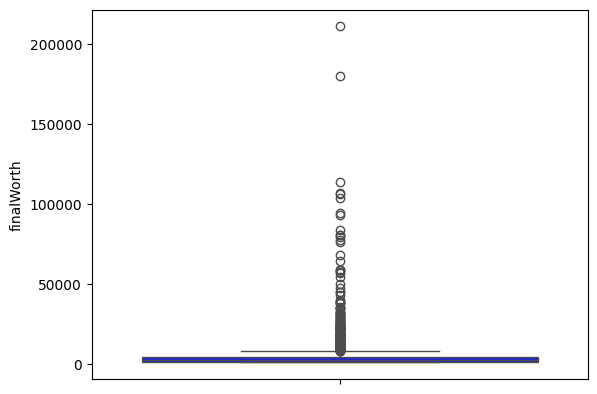

In [8]:
sns.boxplot(bili['finalWorth'], color = 'blue')

Primeiro Quartil - Mediana inferior / 25% da nossa amostra

In [9]:
Q1finalWorth = bili['finalWorth'].quantile(0.25)
Q1finalWorth

1500.0

Segundo Quartil - Mediana do patrimônio liquido final dos bilionarios / 50% da nossa amostra

In [10]:
Q2finalWorth = bili['finalWorth'].quantile(0.50)
Q2finalWorth

2300.0

Terceiro Quartil - Mediana superior / 75% da nossa amostra

In [11]:
Q3finalWorth = bili['finalWorth'].quantile(0.75)
Q3finalWorth

4200.0

Diferença entre o quartil superior e o inferior

In [12]:
IQRage = Q3finalWorth - Q1finalWorth
IQRage

2700.0

Limite Inferior

In [13]:
LimiteI = Q1finalWorth - 1.5*(IQRage)
LimiteI

-2550.0

Limite Superior

In [14]:
LimiteS = Q1finalWorth + 1.5*(IQRage)
LimiteS

5550.0

**Análise das idades dos bilionários**

<Axes: ylabel='age'>

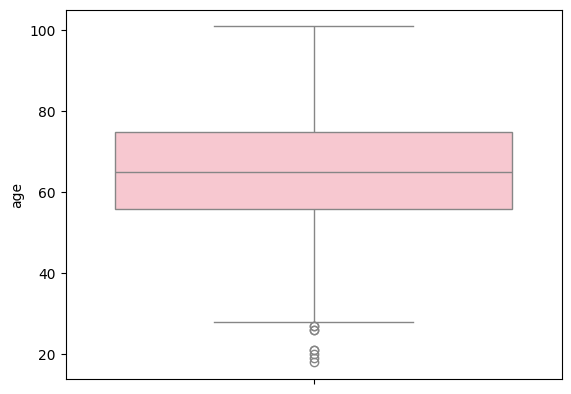

In [15]:
sns.boxplot(bili['age'], color = 'pink')

Primeiro Quartil - Mediana inferior / 25% da nossa amostra

In [16]:
Q1Age = bili['age'].quantile(0.25)
Q1Age

56.0

Segundo Quartil - Mediana de idades dos bilionarios / 50% da nossa amostra

In [17]:
Q2Age = bili['age'].quantile(0.50)
Q2Age

65.0

Terceiro Quartil - Mediana superior / 75% da nossa amostra

In [18]:
Q3Age = bili['age'].quantile(0.75)
Q3Age

75.0

Diferença entre o quartil superior e o inferior

In [19]:
IQRage = Q3Age - Q1Age
IQRage

19.0

Limite Inferior

In [20]:
LimiteI = Q1Age - 1.5*(IQRage)
LimiteI

27.5

Limite Superior

In [21]:
LimiteS = Q1Age + 1.5*(IQRage)
LimiteS

84.5

**Análise do anos de nascimento dos bilionários**

<Axes: ylabel='birthYear'>

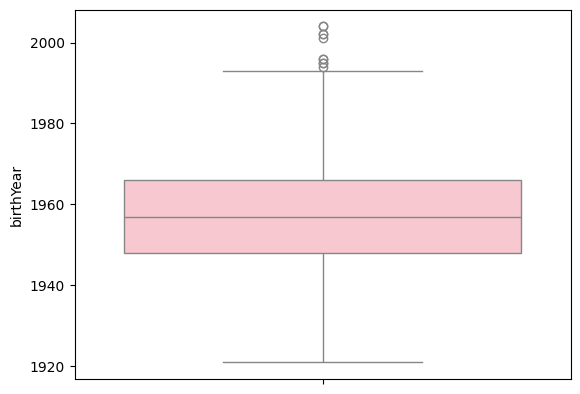

In [22]:
sns.boxplot(bili['birthYear'], color = 'pink')

Primeiro Quartil - Mediana inferior / 25% da nossa amostr

In [23]:
Q1BirthYear = bili['birthYear'].quantile(0.25)
Q1BirthYear

1948.0

Segundo Quartil - Mediana de idades dos bilionarios / 50% da nossa amostra

In [24]:
Q2BirthYear = bili['birthYear'].quantile(0.50)
Q2BirthYear

1957.0

Terceiro Quartil - Mediana superior / 75% da nossa amostr

In [25]:
Q3BirthYear = bili['birthYear'].quantile(0.75)
Q3BirthYear

1966.0

Diferença entre o quartil superior e o inferior

In [26]:
IQRbirthYear = Q3BirthYear - Q1BirthYear
IQRbirthYear

18.0

Limite Inferior

In [27]:
LimiteI = Q1BirthYear - 1.5*(IQRbirthYear)
LimiteI

1921.0

Limite Superior

In [28]:
LimiteS = Q1BirthYear + 1.5*(IQRage)
LimiteS

1976.5

**Análise dos mês de nascimentos dos bilionários**

<Axes: ylabel='birthMonth'>

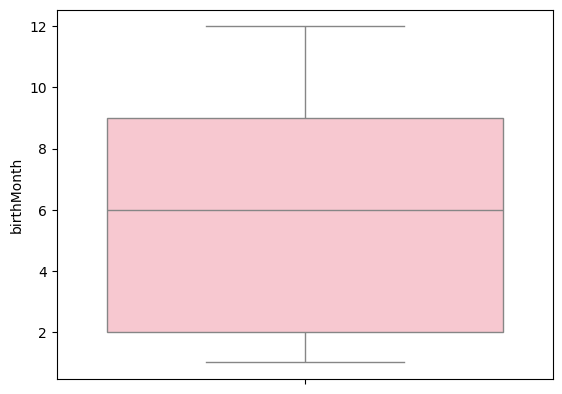

In [29]:
sns.boxplot(bili['birthMonth'], color = 'pink')

Primeiro Quartil - Mediana inferior / 25% da nossa amostra

In [30]:
Q1BirthMonth = bili['birthMonth'].quantile(0.25)
Q1BirthMonth

2.0

Segundo Quartil - Mediana / 50% da nossa amostra

In [31]:
Q2BirthMonth = bili['birthMonth'].quantile(0.50)
Q2BirthMonth

6.0

Terceiro Quartil - Mediana superior / 75% da nossa amostra

In [32]:
Q3BirthMonth = bili['birthMonth'].quantile(0.75)
Q3BirthMonth

9.0

Diferença entre o quartil superior e o inferior

In [33]:
IQRbirthMonth = Q3BirthMonth - Q1BirthMonth
IQRbirthMonth

7.0

Limite Inferior

In [34]:
LimiteI = Q1BirthMonth - 1.5*(IQRbirthMonth)
LimiteI

-8.5

Limite Superior

In [35]:
LimiteS = Q1BirthMonth + 1.5*(IQRbirthMonth)
LimiteS

12.5

**Análise do PIB do país dos bilionários**

Para calcular o PIB do país primeiro precisamos removes os caracteres "$" e "," pois precisamos de apenas números

In [36]:
bili['gdp_country'] = bili['gdp_country'].replace('[\$,]', '', regex=True).astype(float)
bili.gdp_country

0       2.715518e+12
1       2.142770e+13
2       2.142770e+13
3       2.142770e+13
4       2.142770e+13
            ...     
2635    1.991000e+13
2636    2.142770e+13
2637    1.991000e+13
2638    1.991000e+13
2639    3.767955e+11
Name: gdp_country, Length: 2640, dtype: float64

<Axes: ylabel='gdp_country'>

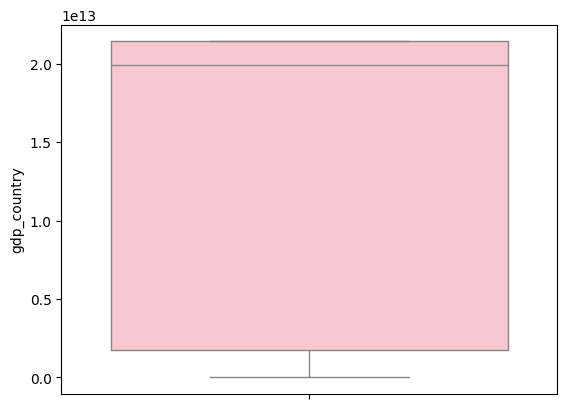

In [37]:
sns.boxplot(bili['gdp_country'], color = 'pink')

Primeiro Quartil - Mediana inferior do PIB do país / 25% da nossa amostra

In [38]:
Q1gdp = bili['gdp_country'].quantile(0.25)
Q1gdp

1736425629520.0

Segundo Quartil - Mediana do PIB do país / 50% da nossa amostra

In [39]:
Q2gdp = bili['gdp_country'].quantile(0.50)
Q2gdp

19910000000000.0

Terceiro Quartil - Mediana superior do PIB do país / 75% da nossa amostra

In [40]:
Q3gdp = bili['gdp_country'].quantile(0.75)
Q3gdp

21427700000000.0

Diferença entre o quartil superior e o inferior

In [41]:
IQRgdp = Q3gdp- Q1gdp
IQRgdp

19691274370480.0

Limite Inferior

In [42]:
LimiteS = Q1gdp - 1.5*(IQRgdp)
LimiteS

-27800485926200.0

Limite Superior

In [43]:
LimiteS = Q1gdp + 1.5*(IQRgdp)
LimiteS

31273337185240.0

**Análise da expectativa de vida no país dos bilionários**

<Axes: ylabel='life_expectancy_country'>

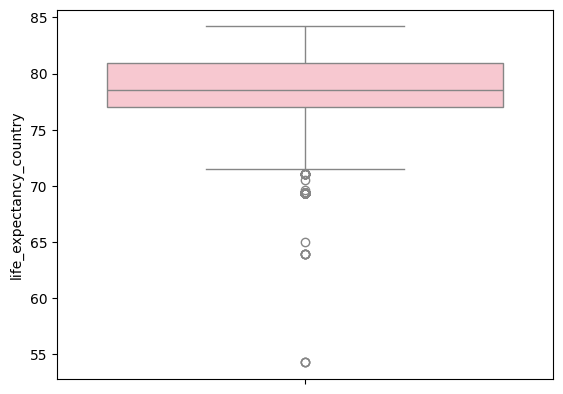

In [44]:
sns.boxplot(bili['life_expectancy_country'], color = 'pink')

Primeiro Quartil - Mediana inferior / 25% da nossa amostra

In [45]:
Q1life = bili['life_expectancy_country'].quantile(0.25)
Q1life

77.0

Segundo Quartil - Mediana / 50% da nossa amostra

In [46]:
Q2life = bili['life_expectancy_country'].quantile(0.50)
Q2life

78.5

Terceiro Quartil - Mediana superior / 75% da nossa amostra

In [47]:
Q3life = bili['life_expectancy_country'].quantile(0.75)
Q3life

80.9

Diferença entre o quartil superior e o inferior:

In [48]:
IQRlife = Q3life - Q1life
IQRlife

3.9000000000000057

Limite Inferior

In [49]:
LimiteI = Q1life - 1.5*(IQRlife)
LimiteI

71.14999999999999

Limite Superior

In [50]:
LimiteS = Q1life + 1.5*(IQRlife)
LimiteS

82.85000000000001

**Análise da receita tributária no país dos bilionários**

<Axes: ylabel='tax_revenue_country_country'>

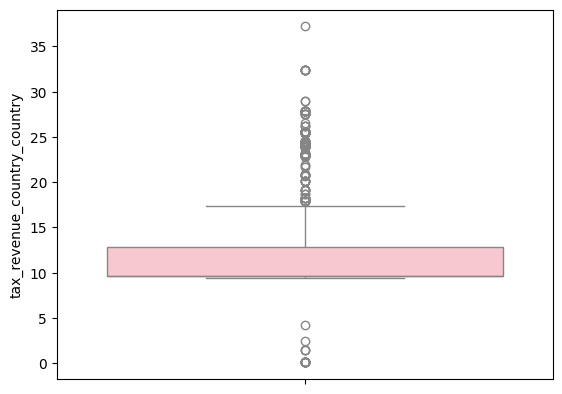

In [51]:
sns.boxplot(bili['tax_revenue_country_country'], color = 'pink')

Primeiro Quartil - Mediana inferior / 25% da nossa amostra

In [52]:
Q1tax = bili['tax_revenue_country_country'].quantile(0.25)
Q1tax

9.6

Segundo Quartil - Mediana  / 50% da nossa amostra

In [53]:
Q2tax = bili['tax_revenue_country_country'].quantile(0.50)
Q2tax

9.6

Terceirto Quartil - Mediana superior / 75% da nossa amostra

In [54]:
Q3tax = bili['tax_revenue_country_country'].quantile(0.75)
Q3tax

12.8

Diferença entre o primeiro e terceiro quartil:

In [55]:
IQRtax = Q3tax - Q1tax
IQRtax

3.200000000000001

Limite Inferior

In [56]:
LimiteI = Q1tax - 1.5*(IQRtax)
LimiteI

4.799999999999998

Limite Superior

In [57]:
LimiteS = Q1tax + 1.5*(IQRtax)
LimiteS

14.400000000000002

**Análise da população do país dos bilionários**

<Axes: ylabel='population_country'>

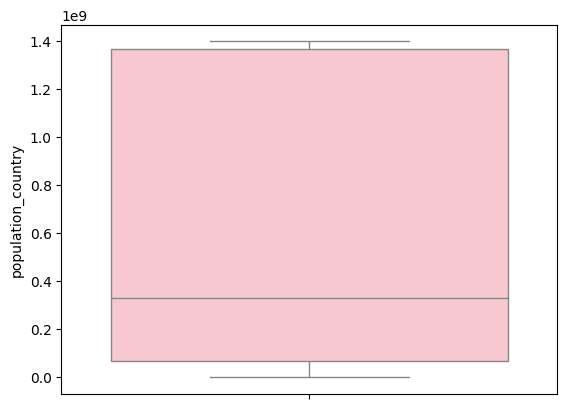

In [58]:
sns.boxplot(bili['population_country'], color = 'pink')

Primeiro Quartil - Mediana inferior / 25% da nossa amostra

In [59]:
Q1pop = bili['population_country'].quantile(0.25)
Q1pop

66834405.0

Segundo Quartil - Mediana / 50% da nossa amostra

In [60]:
Q2pop = bili['population_country'].quantile(0.50)
Q2pop

328239523.0

Terceiro Quartil - Mediana superior / 75% da nossa amostra

In [61]:
Q3pop = bili['population_country'].quantile(0.75)
Q3pop

1366417754.0

Diferença do primieiro e terceito quartil:

In [62]:
IQRpop = Q3pop - Q1pop
IQRpop

1299583349.0

Limite Inferior

In [63]:
LimiteI = Q1pop - 1.5*(IQRpop)
LimiteI

-1882540618.5

Limite Superior

In [64]:
LimiteS = Q1pop + 1.5*(IQRpop)
LimiteS

2016209428.5

**Análise do índice de Preços ao Consumidor (IPC) do país dos bilionários**

<Axes: ylabel='cpi_country'>

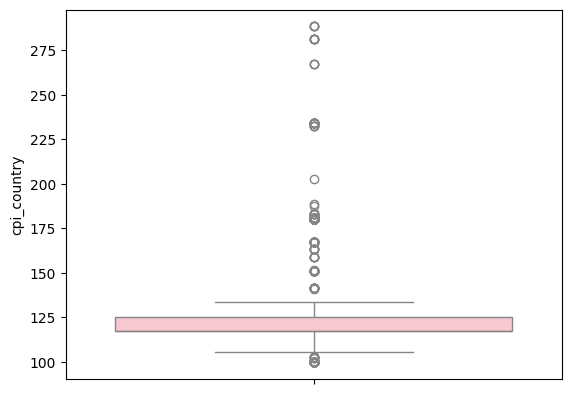

In [65]:
sns.boxplot(bili['cpi_country'], color = 'pink')

Primeiro Quartil - Mediana inferior / 25% da nossa amostra

In [66]:
Q1cpi = bili['cpi_country'].quantile(0.25)
Q1cpi

117.24

Segundo Quartil - Mediana / 50% da nossa amostra

In [67]:
Q2cpi = bili['cpi_country'].quantile(0.50)
Q2cpi

117.24

Terceiro Quartil - Mediana superior / 75% da nossa amostra

In [68]:
Q3cpi = bili['cpi_country'].quantile(0.75)
Q3cpi

125.08

Diferença entre o primeiro e terciro quartil

In [69]:
IQRcpi = Q3cpi - Q1cpi
IQRcpi

7.840000000000003

Limite Inferior

In [70]:
LimiteI = Q1cpi - 1.5*(IQRcpi)
LimiteI

105.47999999999999

Limite Superior

In [71]:
LimiteS = Q1cpi + 1.5*(IQRcpi)
LimiteS

129.0

**Análise da alteração do IPC do país dos bilionários**

<Axes: ylabel='cpi_change_country'>

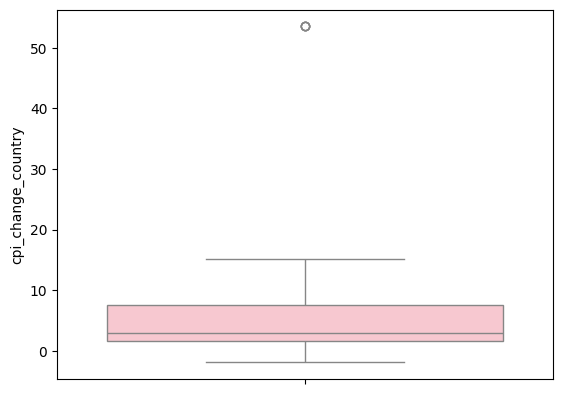

In [72]:
sns.boxplot(bili['cpi_change_country'], color = 'pink')

Primeiro Quartil - Mediana  inferior/ 25% da nossa amostra

In [73]:
Q1cpiChange = bili['cpi_change_country'].quantile(0.25)
Q1cpiChange

1.7

Segundo Quartil - Mediana / 50% da nossa amostra

In [74]:
Q2cpiChange = bili['cpi_change_country'].quantile(0.50)
Q2cpiChange

2.9

Terceiro Quartil - Mediana superior/ 75% da nossa amostra

In [75]:
Q3cpiChange = bili['cpi_change_country'].quantile(0.75)
Q3cpiChange

7.5

Diferença entre o primeiro e terceiro quartil

In [76]:
IQRcpiChange = Q3cpiChange - Q1cpiChange
IQRcpiChange

5.8

Limite Inferior

In [77]:
LimiteI = Q1cpiChange - 1.5*(IQRcpiChange)
LimiteI

-6.999999999999999

Limite Superior

In [78]:
LimiteS = Q1cpiChange + 1.5*(IQRcpiChange)
LimiteS

10.399999999999999

**Análise da matrícula no ensino superior no país dos bilionários**

<Axes: ylabel='gross_tertiary_education_enrollment'>

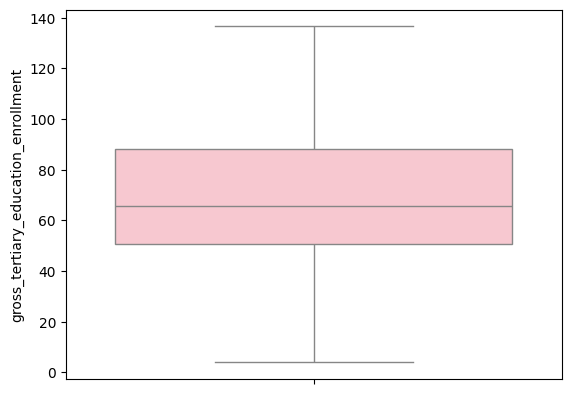

In [79]:
sns.boxplot(bili['gross_tertiary_education_enrollment'], color = 'pink')

Primeiro Quartil - Mediana inferior/ 25% da nossa amostra

In [80]:
Q1gross= bili['gross_tertiary_education_enrollment'].quantile(0.25)
Q1gross

50.6

Segundo Quartil - Mediana / 50% da nossa amostra

In [81]:
Q2gross= bili['gross_tertiary_education_enrollment'].quantile(0.50)
Q2gross

65.6

Terceiro Quartil - Mediana superior/ 75% da nossa amostra

In [82]:
Q3gross= bili['gross_tertiary_education_enrollment'].quantile(0.75)
Q3gross

88.2

Diferença entre o primeiro e o terceiro quartil

In [83]:
IQRgross = Q3gross- Q1gross
IQRgross

37.6

Limite Inferior

In [84]:
LimiteI = Q1gross - 1.5*(IQRgross)
LimiteI

-5.800000000000004

Limite Superior

In [85]:
LimiteS = Q1gross + 1.5*(IQRgross)
LimiteS

107.0

**Análise da matrículas no ensino primário no país dos bilionários**

<Axes: ylabel='gross_primary_education_enrollment_country'>

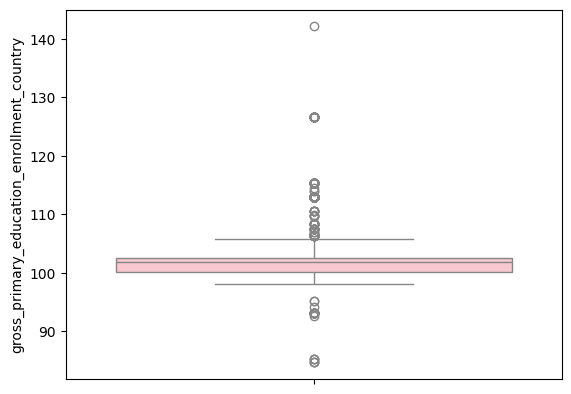

In [86]:
sns.boxplot(bili['gross_primary_education_enrollment_country'], color = 'pink')

Primeiro Quartil - Mediana inferior/ 25% da nossa amostra

In [87]:
Q1grossP= bili['gross_primary_education_enrollment_country'].quantile(0.25)
Q1grossP

100.2

Segundo Quartil - Mediana / 50% da nossa amostra

In [88]:
Q2grossP= bili['gross_primary_education_enrollment_country'].quantile(0.50)
Q2grossP

101.8

Terceiro Quartil - Mediana superior/ 75% da nossa amostra

In [89]:
Q3grossP= bili['gross_primary_education_enrollment_country'].quantile(0.75)
Q3grossP

102.6

Diferença entre os quartil superior e inferior

In [90]:
IQRgrossP = Q3grossP- Q1grossP
IQRgrossP

2.3999999999999915

Limite Inferior

In [91]:
LimiteI = Q1grossP - 1.5*(IQRgrossP)
LimiteI

96.60000000000002

Limite Superior

In [92]:
LimiteS = Q1grossP + 1.5*(IQRgrossP)
LimiteS

103.79999999999998

**Análise da alíquota total de impostos no país dos bilionários**

<Axes: ylabel='total_tax_rate_country'>

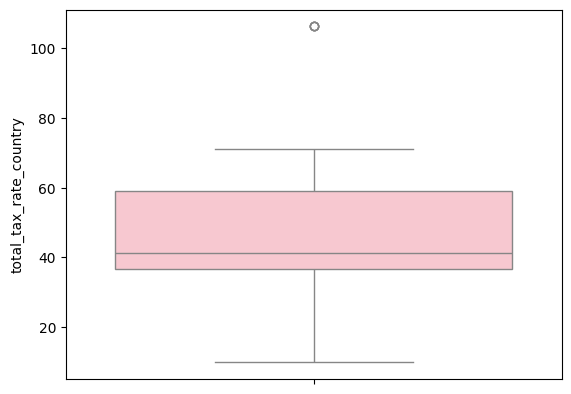

In [93]:
sns.boxplot(bili['total_tax_rate_country'], color = 'pink')

Primeiro Quartil - Mediana superior/ 25% da nossa amostra

In [94]:
Q1taxRate= bili['total_tax_rate_country'].quantile(0.25)
Q1taxRate

36.6

Segundo Quartil - Mediana superior/ 50% da nossa amostra

In [95]:
Q2taxRate= bili['total_tax_rate_country'].quantile(0.50)
Q2taxRate

41.2

Terceiro Quartil - Mediana superior/ 75% da nossa amostra

In [96]:
Q3taxRate= bili['total_tax_rate_country'].quantile(0.75)
Q3taxRate

59.1

Diferença entre o primeiro e terceiro quartil

In [97]:
IQRtaxRate = Q3taxRate - Q1taxRate
IQRtaxRate

22.5

Limite Inferior

In [98]:
LimiteI = Q1taxRate - 1.5*(IQRtaxRate)
LimiteI

2.8500000000000014

Limite Superior

In [99]:
LimiteS = Q1taxRate + 1.5*(IQRtaxRate)
LimiteS

70.35

# **Histograma**

É uma espécie de gráficos de barras que demonstra uma distribuição de frequências.

**Análise do patrimônio líquido final dos bilionários em dólares americanos**


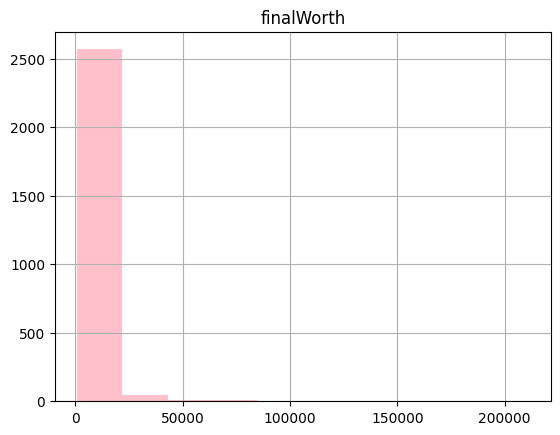

In [100]:
bili.hist(column = 'finalWorth', bins = 10, color = 'pink')
plt.show()

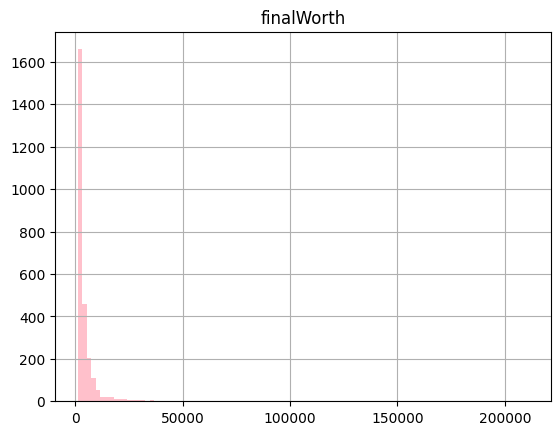

In [101]:
bili.hist(column = 'finalWorth', bins = 100, color = 'pink')
plt.show()

**Análise das idades dos bilonários**

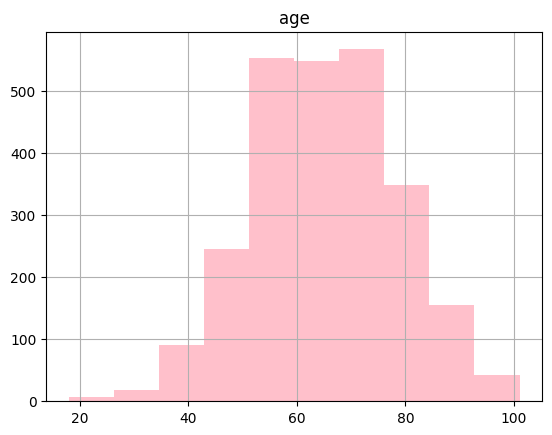

In [102]:
bili.hist(column = 'age', bins = 10, color = 'pink')
plt.show()

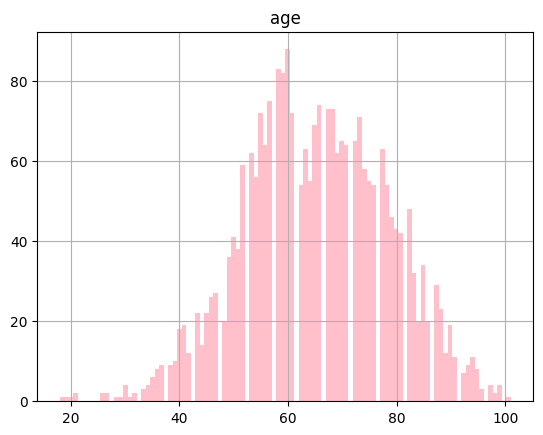

In [103]:
bili.hist(column = 'age', bins = 100, color = 'pink')
plt.show()

**Análise do ano de nascimento dos bilinários**

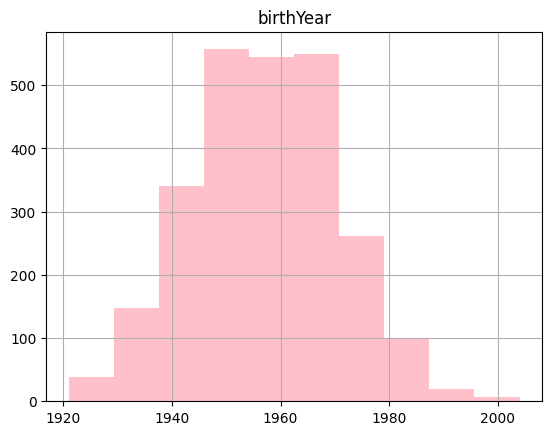

In [104]:
bili.hist(column = 'birthYear', bins = 10, color = 'pink')
plt.show()

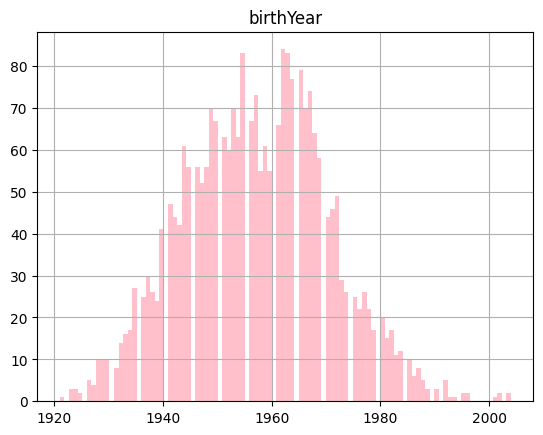

In [105]:
bili.hist(column = 'birthYear', bins = 100, color = 'pink')
plt.show()

**Análise do mês de nascimento dos bilionários**

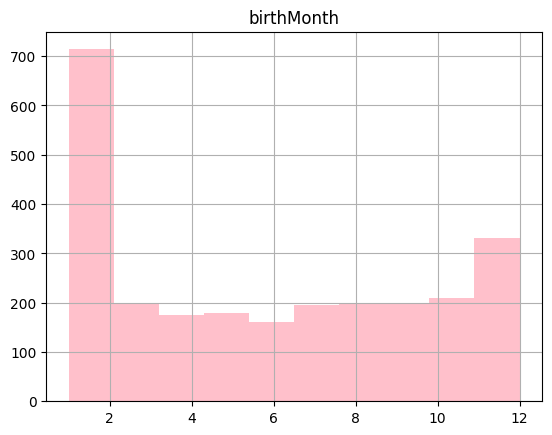

In [106]:
bili.hist(column = 'birthMonth', bins = 10, color = 'pink')
plt.show()

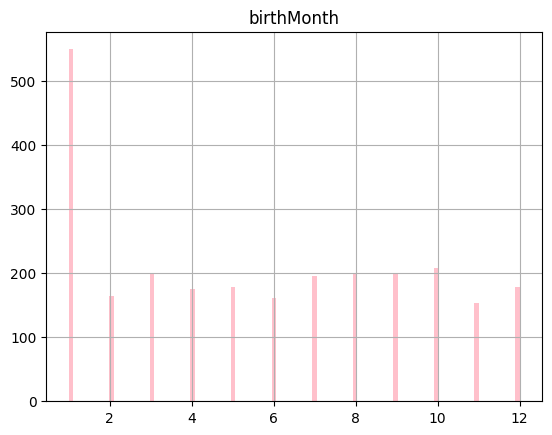

In [107]:
bili.hist(column = 'birthMonth', bins = 100, color = 'pink')
plt.show()

**Análise do Produto Interno Bruto (PIB) do país dos bilionários**


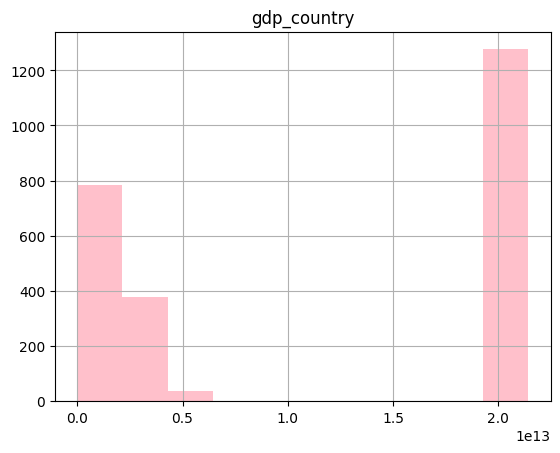

In [108]:
bili.hist(column = 'gdp_country', bins = 10, color = 'pink')
plt.show()

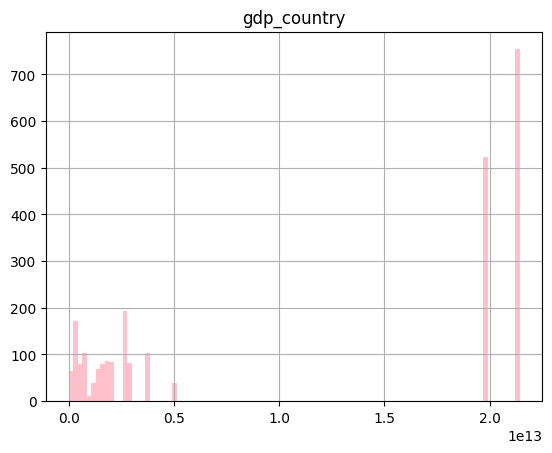

In [109]:
bili.hist(column = 'gdp_country', bins = 100, color = 'pink')
plt.show()

**Análise da expectativa de vida de ada país dos bilionários**

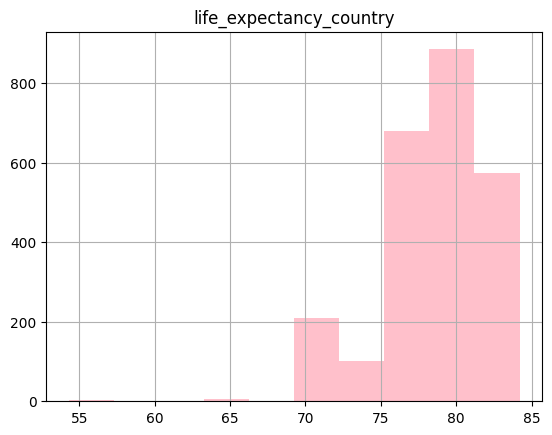

In [110]:
bili.hist(column = 'life_expectancy_country', bins = 10, color = 'pink')
plt.show()

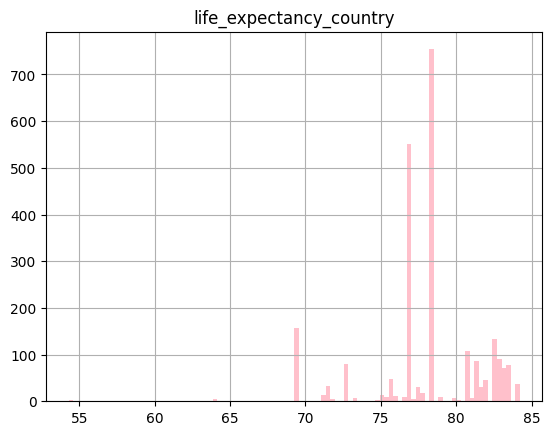

In [111]:
bili.hist(column = 'life_expectancy_country', bins = 100, color = 'pink')
plt.show()

**Análise da receita tributária no país dos bilionários**


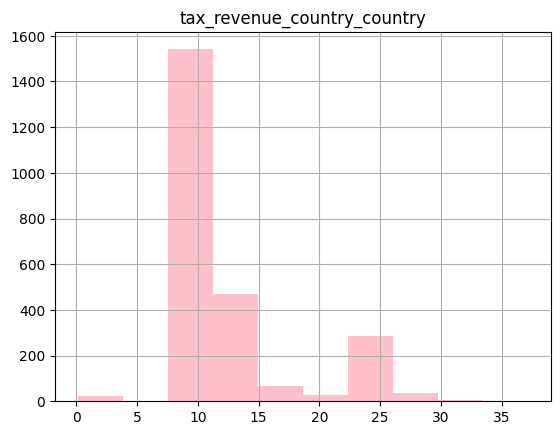

In [112]:
bili.hist(column = 'tax_revenue_country_country', bins = 10, color = 'pink')
plt.show()

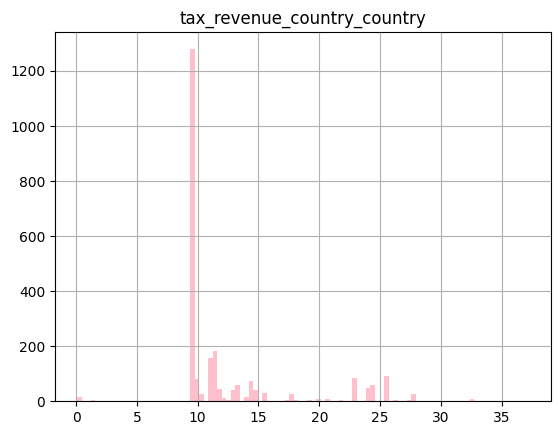

In [113]:
bili.hist(column = 'tax_revenue_country_country', bins = 100, color = 'pink')
plt.show()

**Análise da população de cada país dos bilionários**

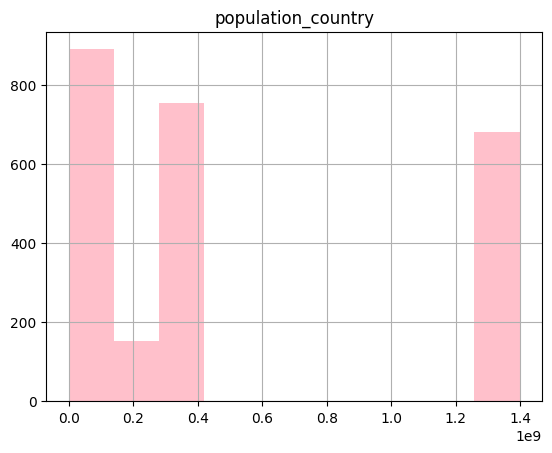

In [114]:
bili.hist(column = 'population_country', bins = 10, color = 'pink')
plt.show()

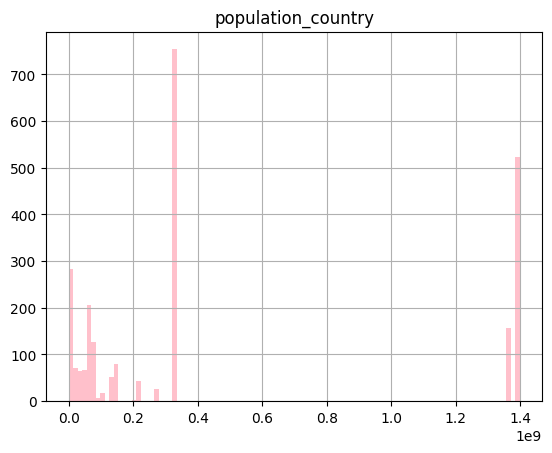

In [115]:
bili.hist(column = 'population_country', bins = 100, color = 'pink')
plt.show()

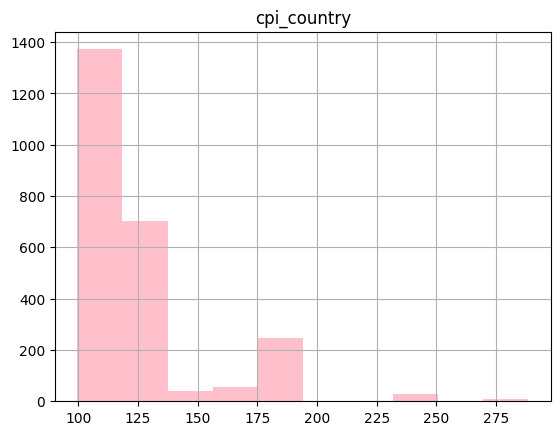

In [116]:
bili.hist(column = 'cpi_country', bins = 10, color = 'pink')
plt.show()

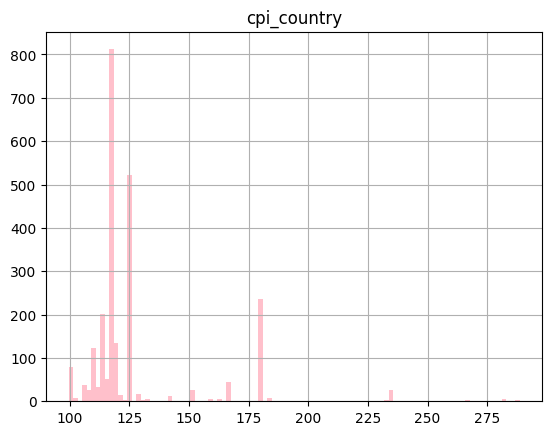

In [117]:
bili.hist(column = 'cpi_country', bins = 100, color = 'pink')
plt.show()

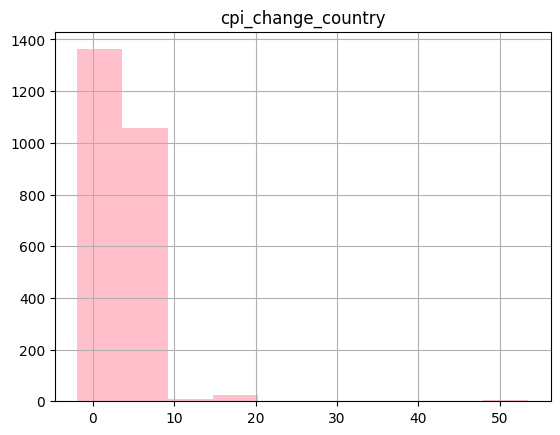

In [118]:
bili.hist(column = 'cpi_change_country', bins = 10, color = 'pink')
plt.show()

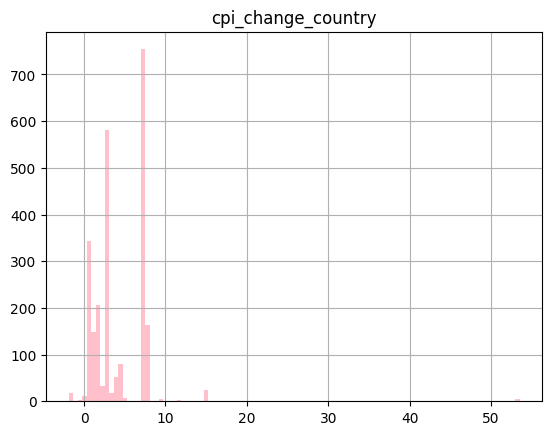

In [119]:
bili.hist(column = 'cpi_change_country', bins = 100, color = 'pink')
plt.show()

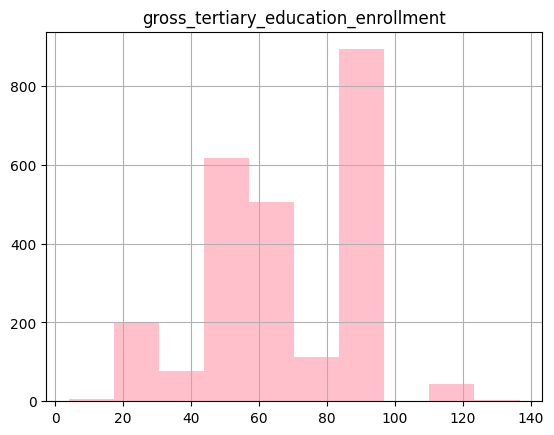

In [120]:
bili.hist(column = 'gross_tertiary_education_enrollment', bins = 10, color = 'pink')
plt.show()

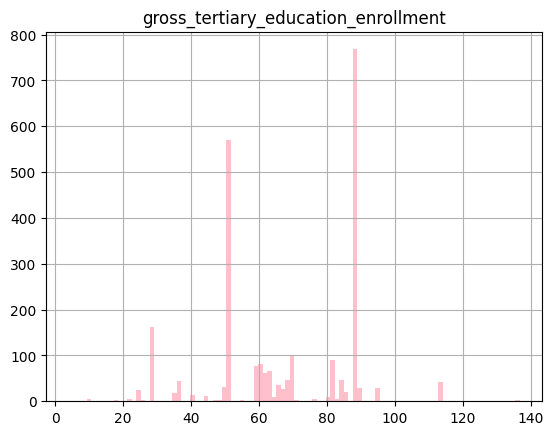

In [121]:
bili.hist(column = 'gross_tertiary_education_enrollment', bins = 100, color = 'pink')
plt.show()

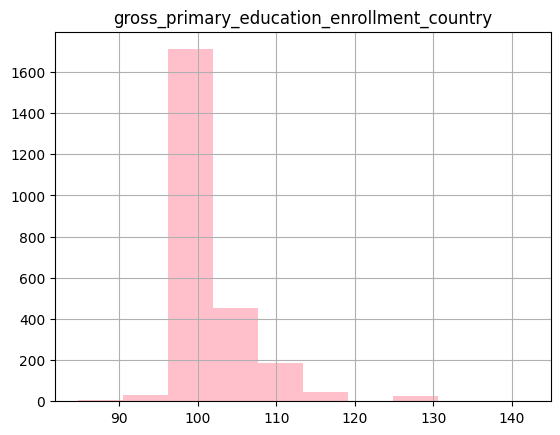

In [122]:
bili.hist(column = 'gross_primary_education_enrollment_country', bins = 10, color = 'pink')
plt.show()

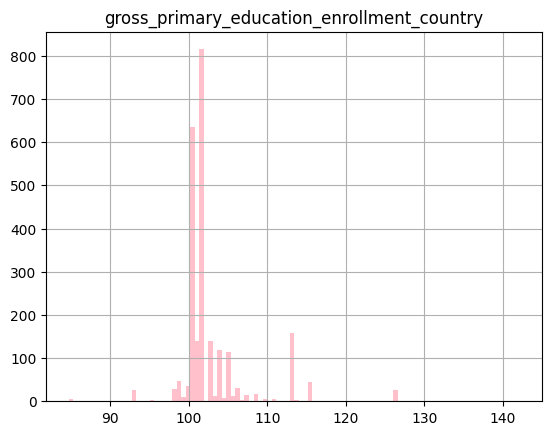

In [123]:
bili.hist(column = 'gross_primary_education_enrollment_country', bins = 100, color = 'pink')
plt.show()

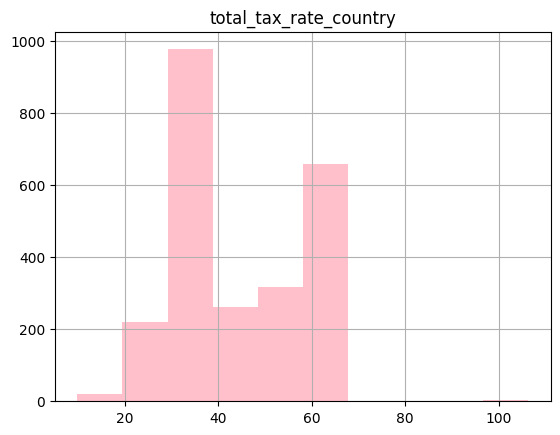

In [124]:
bili.hist(column = 'total_tax_rate_country', bins = 10, color = 'pink')
plt.show()

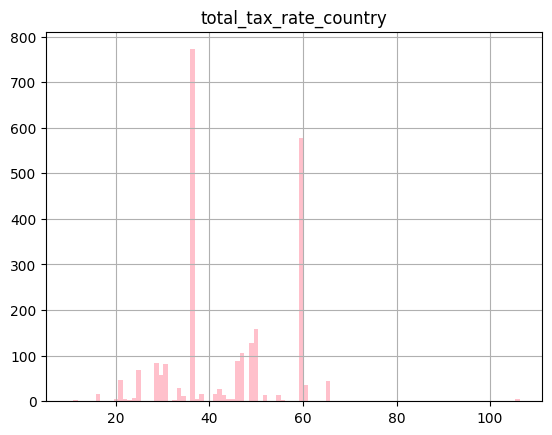

In [125]:
bili.hist(column = 'total_tax_rate_country', bins = 100, color = 'pink')
plt.show()

# **Scatter plot**

É um gráfico de dispersão.

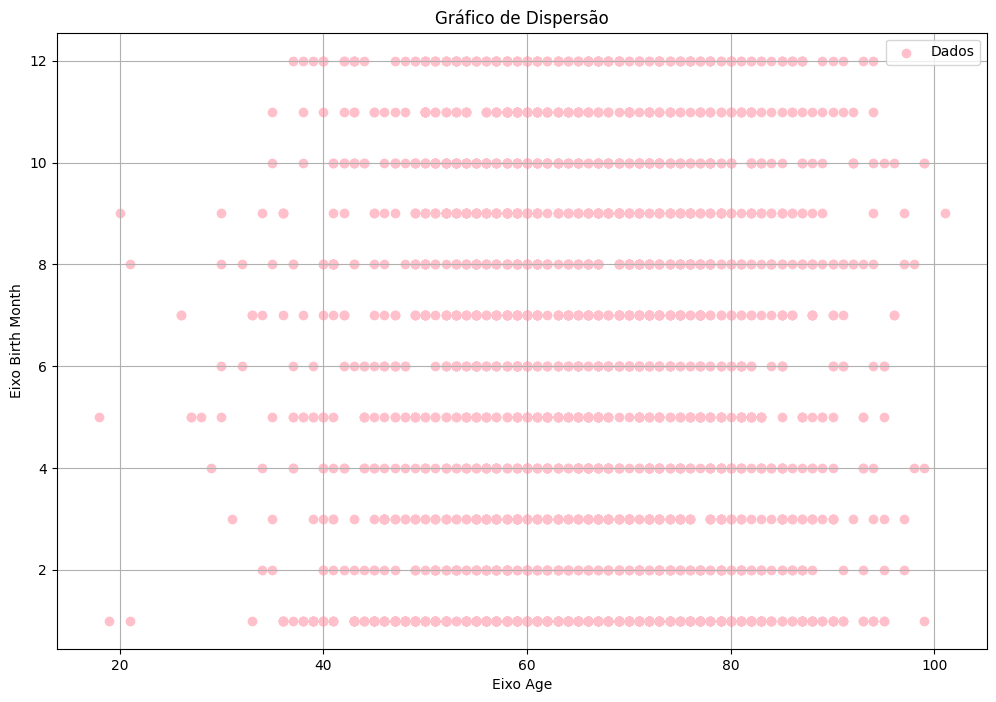

In [126]:
plt.figure(figsize=(12, 8))

plt.scatter(bili['age'], bili['birthMonth'], c='pink', marker='o', label='Dados')

# Personalize o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo Age')
plt.ylabel('Eixo Birth Month')
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicione grades
plt.show()

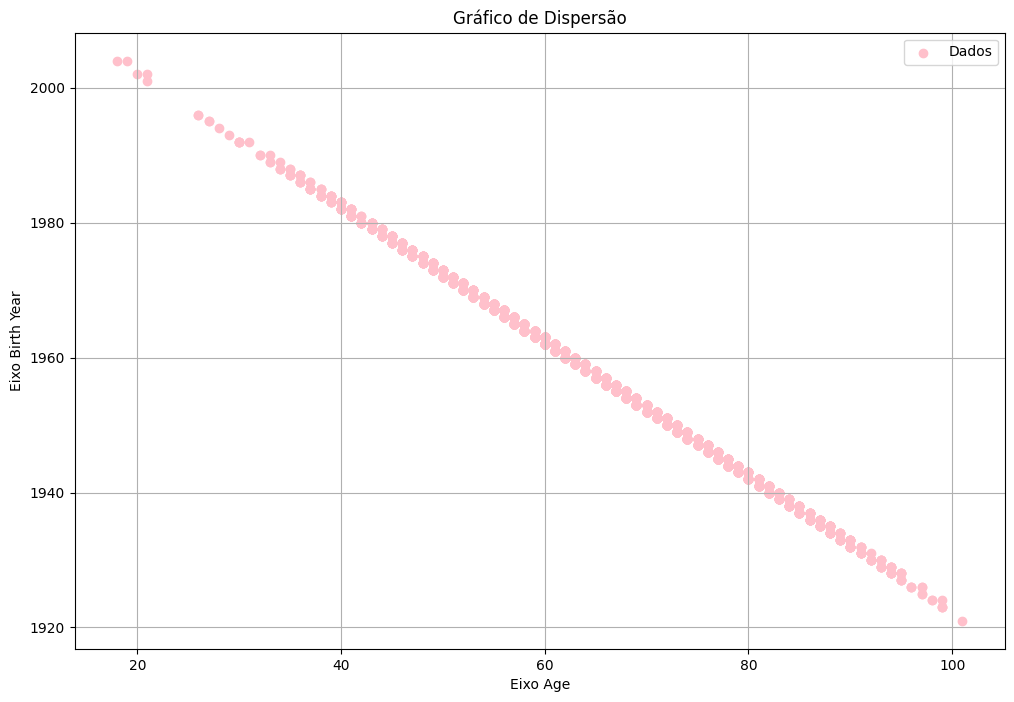

In [127]:
plt.figure(figsize=(12, 8))

plt.scatter(bili['age'], bili['birthYear'], c='pink', marker='o', label='Dados')

# Personalize o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo Age')
plt.ylabel('Eixo Birth Year')
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicione grades
plt.show()

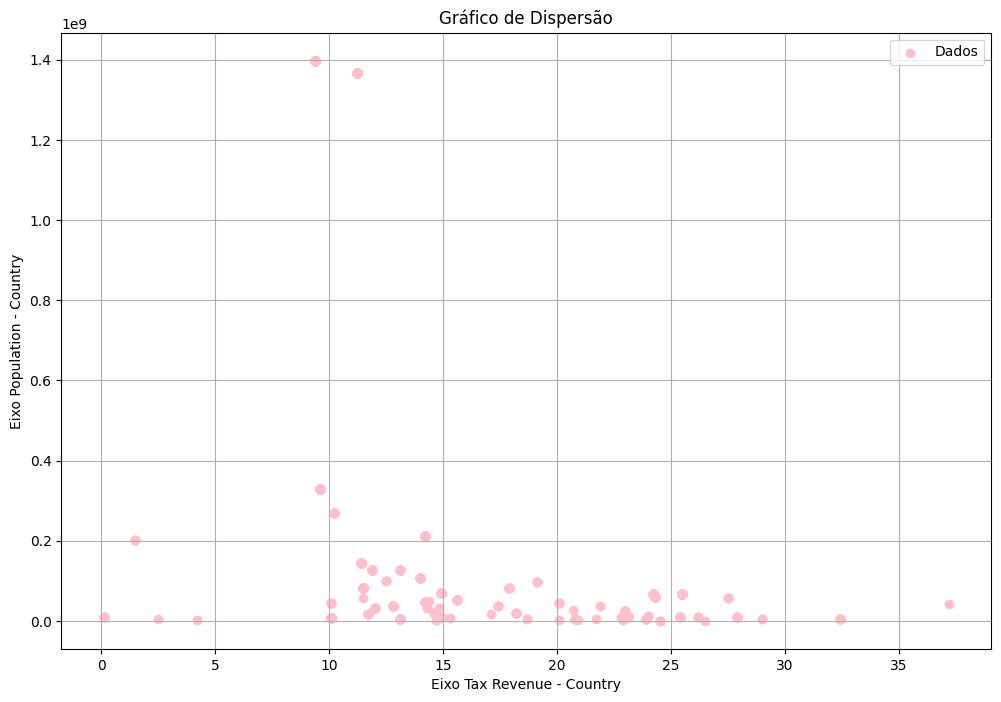

In [128]:
plt.figure(figsize=(12, 8))

plt.scatter(bili['tax_revenue_country_country'], bili['population_country'], c='pink', marker='o', label='Dados')

# Personalize o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo Tax Revenue - Country')
plt.ylabel('Eixo Population - Country')
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicione grades
plt.show()

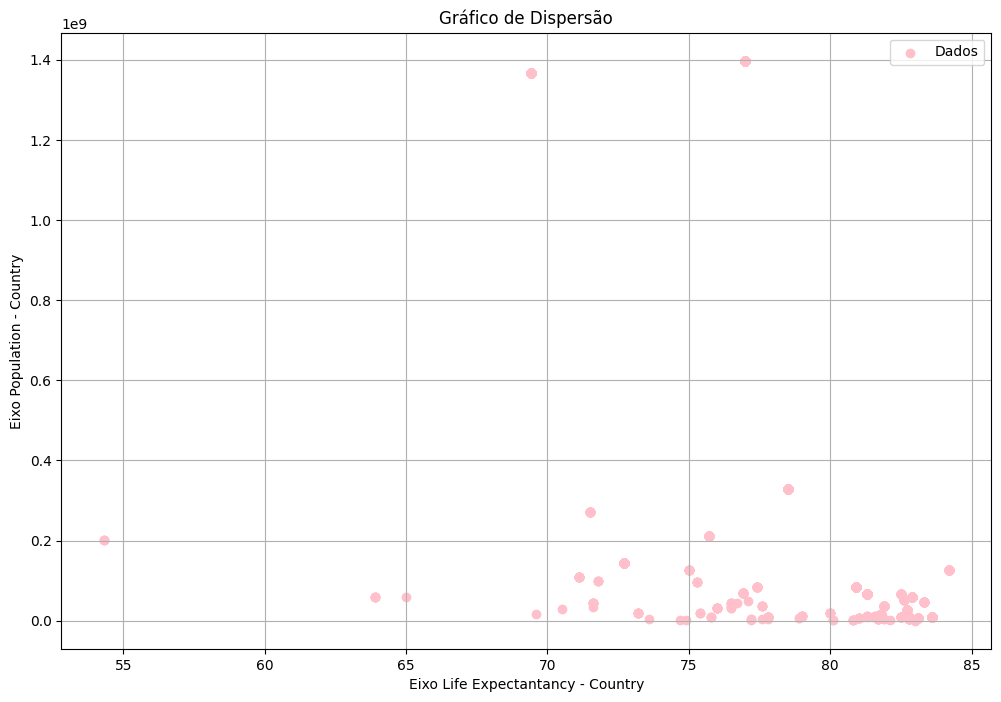

In [129]:
plt.figure(figsize=(12, 8))

plt.scatter(bili['life_expectancy_country'], bili['population_country'], c='pink', marker='o', label='Dados')

# Personalize o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo Life Expectantancy - Country')
plt.ylabel('Eixo Population - Country')
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicione grades
plt.show()

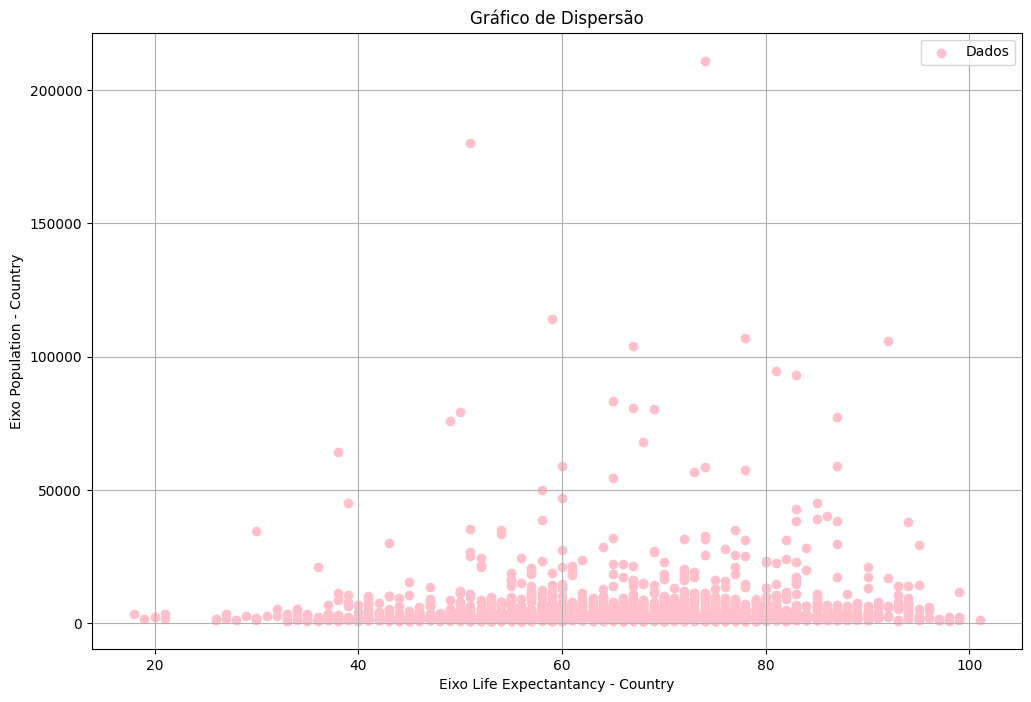

In [130]:
plt.figure(figsize=(12, 8))

plt.scatter(bili['age'], bili['finalWorth'], c='pink', marker='o', label='Dados')

# Personalize o gráfico
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo Life Expectantancy - Country')
plt.ylabel('Eixo Population - Country')
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicione grades
plt.show()

# **Mapa de Calor**
Trata-se de uma representação gráfica do volume de dados das páginas identificada por meio de cores

Justificativa:

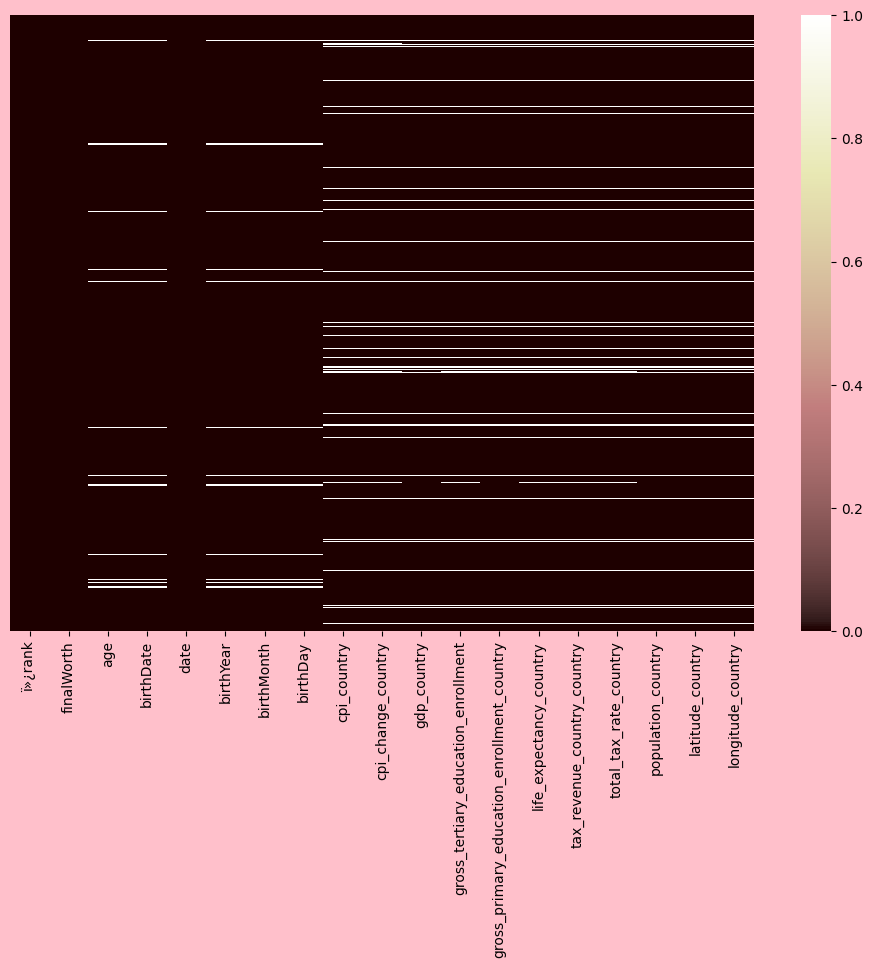

In [131]:
plt.figure(figsize=(12, 8), facecolor='pink')
sns.heatmap(bili.isnull(), yticklabels=False, cmap="pink")
plt.show()

# **Normalização**

- Ajustar para o gráfico correlacionar duas colunas do dataset

<Axes: >

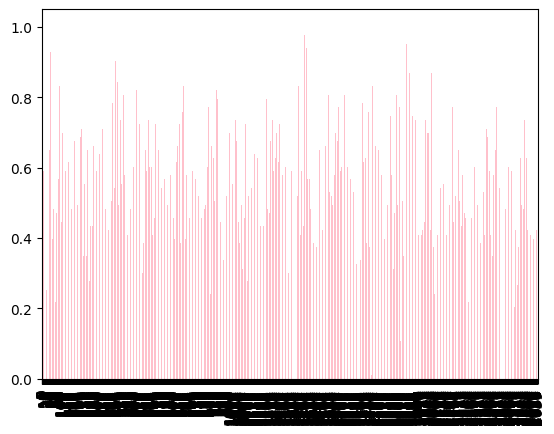

In [132]:
# copiar o dataframe
bili_min_max_scaled = bili.copy()

# Aplicar a tecnina de normalização de minimo e maximo
column = 'age'
bili_min_max_scaled[column] = (bili_min_max_scaled[column] - bili_min_max_scaled[column].min()) / (bili_min_max_scaled[column].max() - bili_min_max_scaled[column].min())

#  Visualizar dados normalizados
bili_min_max_scaled['age'].plot(kind='bar',color = 'pink')

<Axes: >

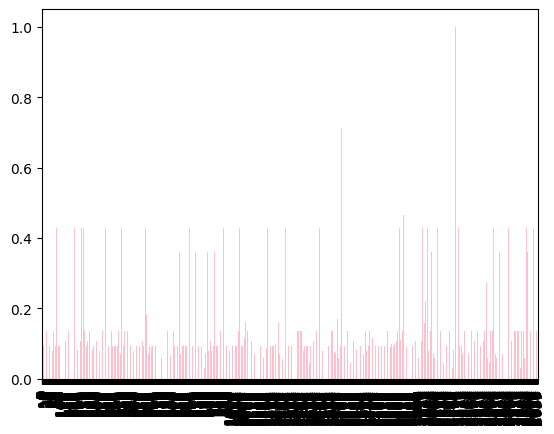

In [133]:
# copiar o dataframe
bili_min_max_scaled = bili.copy()

# Aplicar a tecnina de normalização de minimo e maximo
column = 'cpi_country'
bili_min_max_scaled[column] = (bili_min_max_scaled[column] - bili_min_max_scaled[column].min()) / (bili_min_max_scaled[column].max() - bili_min_max_scaled[column].min())

#  Visualizar dados normalizados
bili_min_max_scaled['cpi_country'].plot(kind='bar', color='pink')

<Axes: >

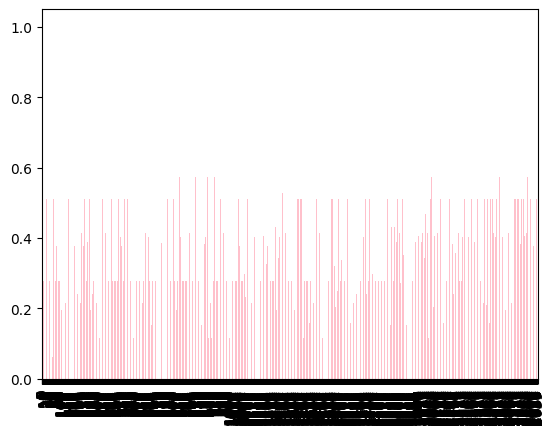

In [134]:
# copiar o dataframe
bili_min_max_scaled = bili.copy()

# Aplicar a tecnina de normalização de minimo e maximo
column = 'total_tax_rate_country'
bili_min_max_scaled[column] = (bili_min_max_scaled[column] - bili_min_max_scaled[column].min()) / (bili_min_max_scaled[column].max() - bili_min_max_scaled[column].min())

#  Visualizar dados normalizados
bili_min_max_scaled['total_tax_rate_country'].plot(kind='bar', color='pink')

# **Distribuições Amostrais / Intervalos de confianças**



Distribuição amostral de age

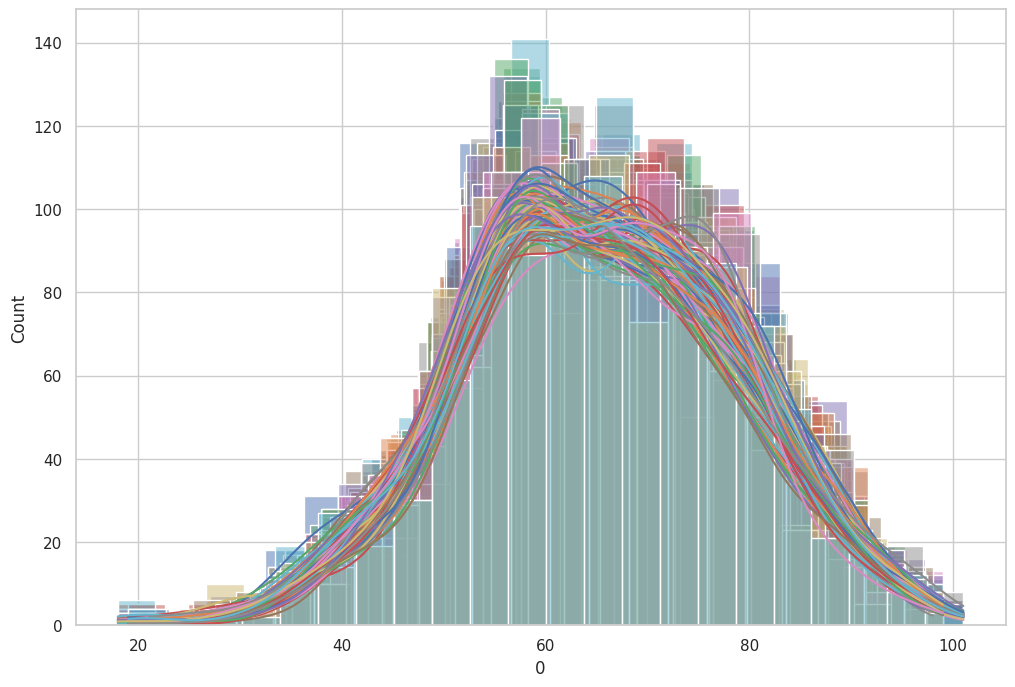

In [135]:
#variável de interesse
variable_of_interest = 'age'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gera amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')

# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()


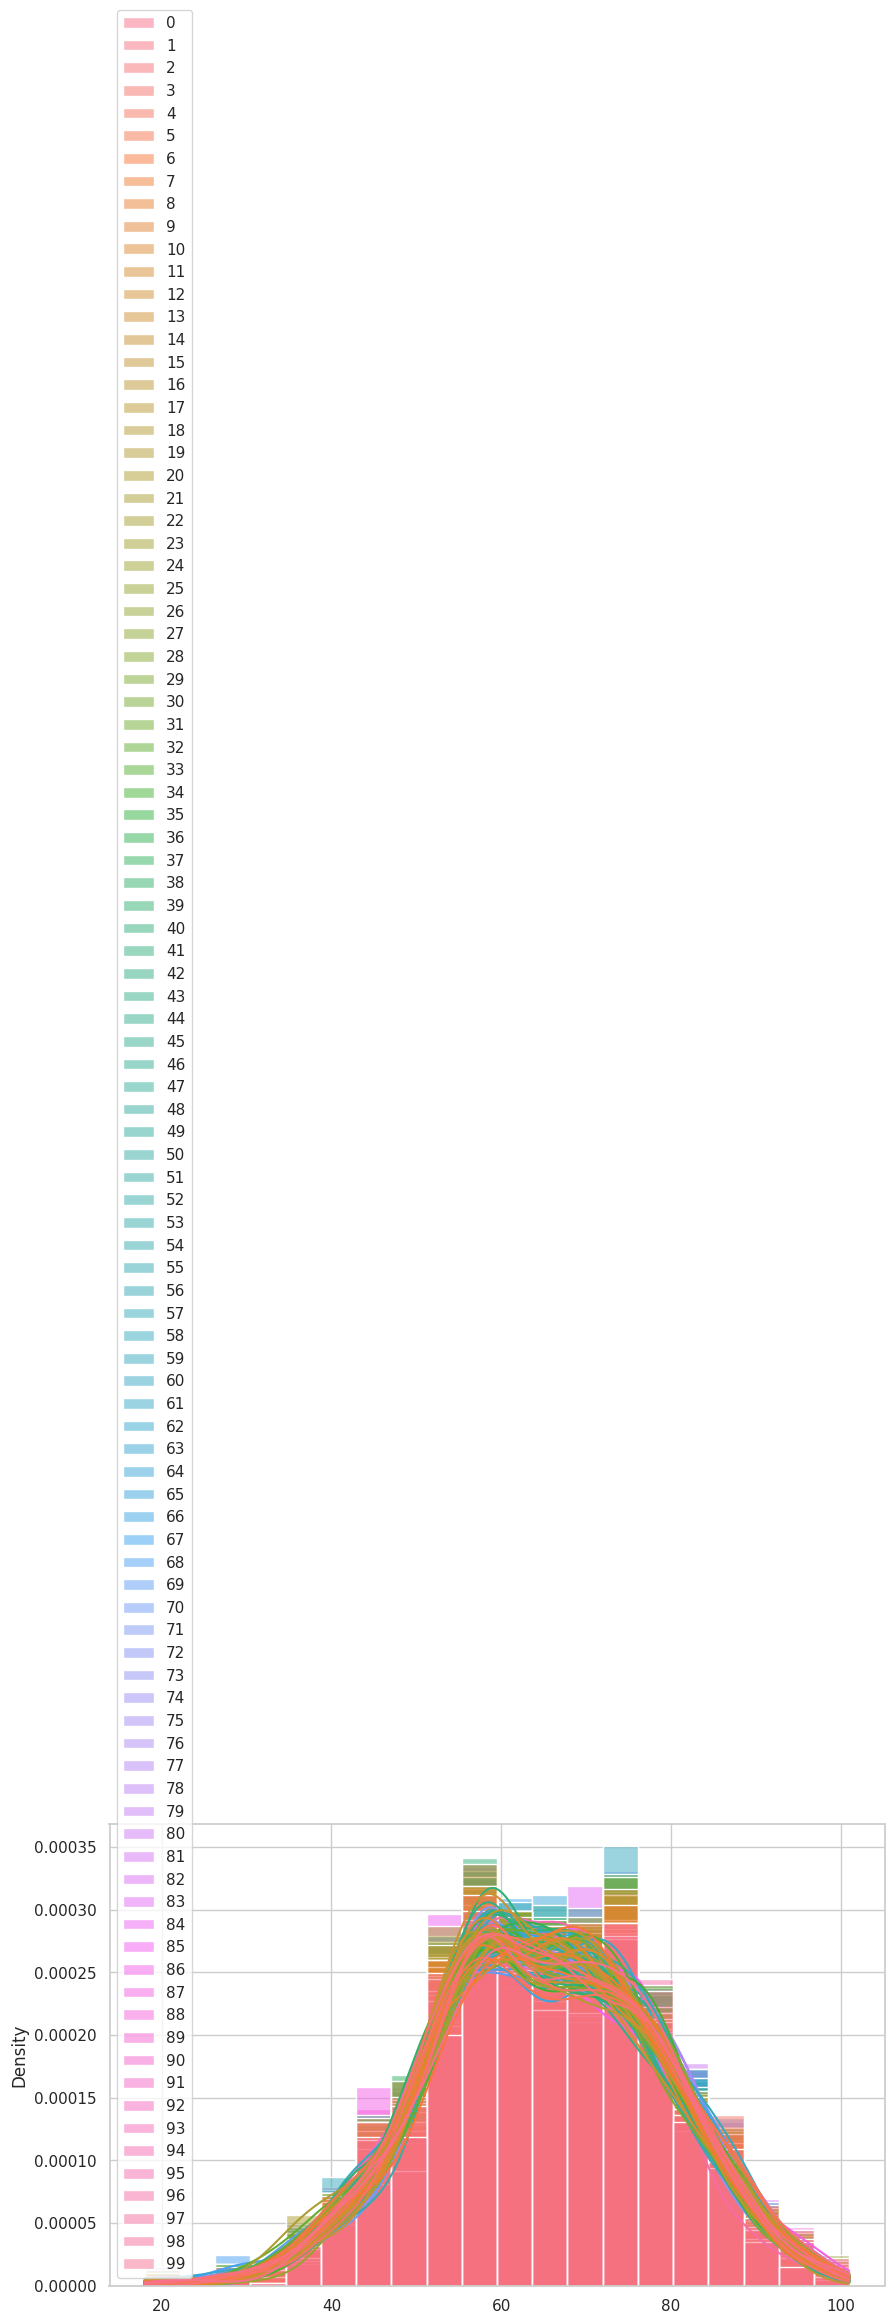

In [136]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança Age

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifica os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonda os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exibe os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[65.08671, 66.474315], [63.988387, 65.385596], [64.467673, 65.854048], [64.507023, 65.863499], [65.13347, 66.549983], [64.379614, 65.838046], [64.725225, 66.122759], [64.492004, 65.854745], [64.399603, 65.761056], [64.780901, 66.140748], [64.386073, 65.791841], [64.677982, 66.02802], [64.626512, 66.025035], [63.761066, 65.114831], [64.127505, 65.523777], [64.312102, 65.657097], [64.589018, 65.93913], [64.639371, 65.93818], [65.181188, 66.540124], [64.409247, 65.779665], [63.330118, 64.771923], [64.238769, 65.635328], [65.356827, 66.747788], [64.70616, 66.071504], [64.266849, 65.640463], [65.416992, 66.75309], [64.270609, 65.65818], [64.097659, 65.487908], [64.499696, 65.924172], [63.895252, 65.251114], [64.526495, 65.902076], [63.648646, 65.042411], [64.032951, 65.460927], [65.253047, 66.593422], [64.810608, 66.215033], [64.790135, 66.185275], [64.282366, 65.627285], [63.76934, 65.195895], [63.743006, 65.113843], [64.074555, 65.469774], [64

Distribuição amostral de Final Worth

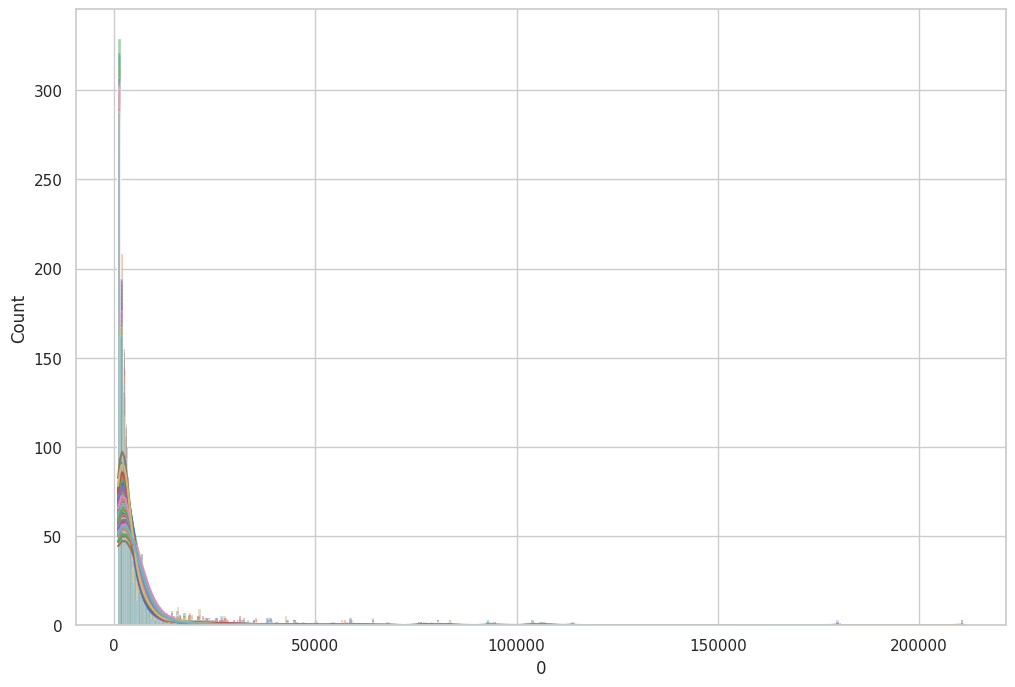

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'finalWorth'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gera amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converte as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configura o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

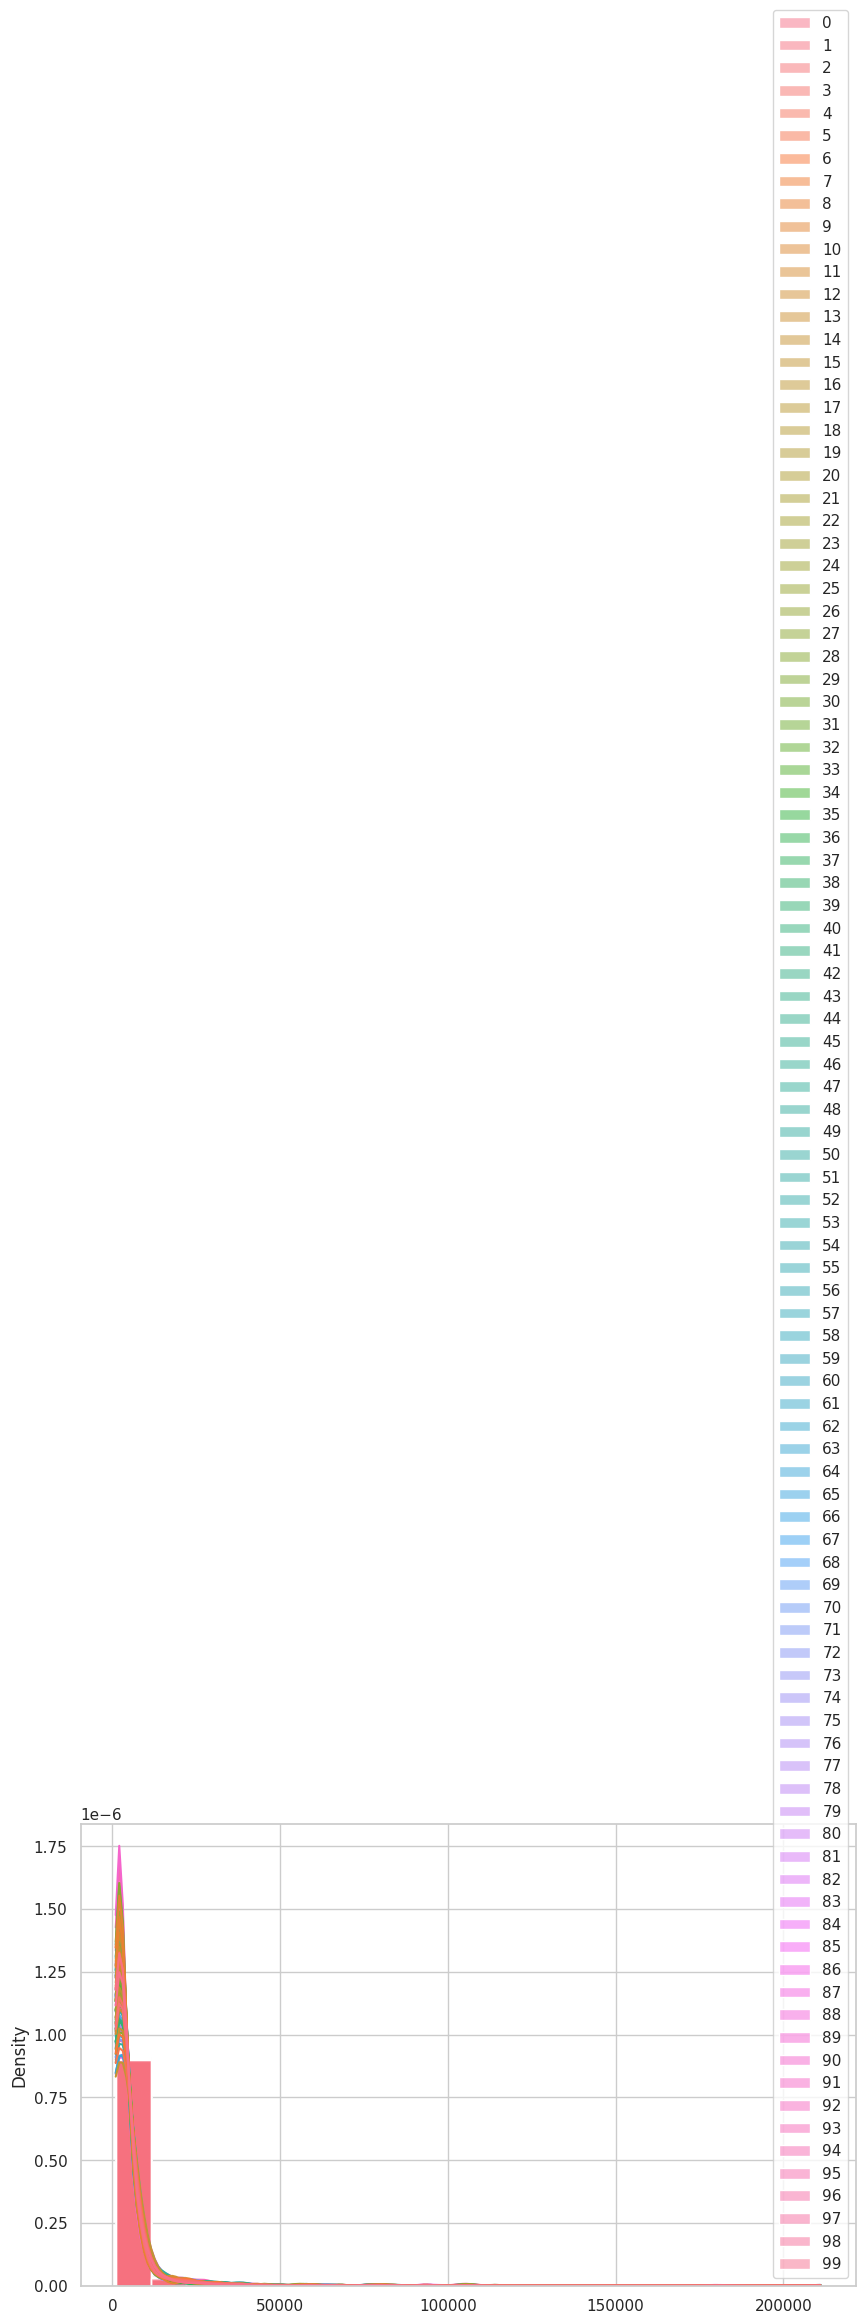

In [139]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança Final Worth

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifica os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonda os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exibe os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[4079.854465, 5080.145535], [4105.783753, 5037.816247], [4017.481786, 5154.918214], [4039.104439, 4981.095561], [4154.704949, 5245.495051], [4370.032927, 5811.767073], [4448.806622, 5765.393378], [3779.551163, 4705.448837], [4014.762813, 4821.637187], [3760.043642, 4538.356358], [4327.929817, 5259.870183], [4285.879613, 5465.320387], [4182.217792, 4984.182208], [4068.102048, 4922.297952], [4344.475764, 5614.524236], [4500.052347, 6013.547653], [4145.223898, 5061.376102], [4316.52439, 5377.07561], [3951.232649, 4956.767351], [4133.435497, 5203.964503], [4205.979211, 5320.420789], [4502.175054, 5594.624946], [4008.538395, 4947.861605], [3940.317704, 4734.682296], [4190.623859, 5205.776141], [3985.643953, 4889.556047], [4112.555398, 5208.844602], [3845.716528, 4570.883472], [4469.201636, 5744.198364], [4486.526484, 5489.873516], [4107.204534, 5077.995466], [4192.577654, 5342.222346], [4006.947554, 5062.852446], [4017.023452, 4990.176548], [428

Distribuição amostral de Birth year

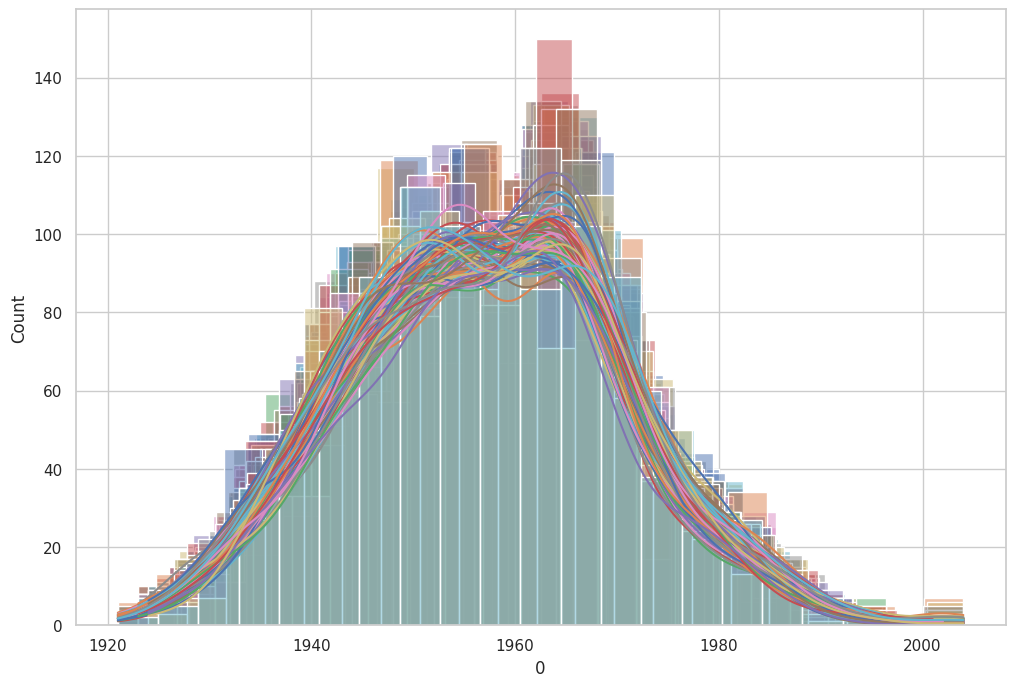

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'birthYear'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gera amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converte as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configura o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

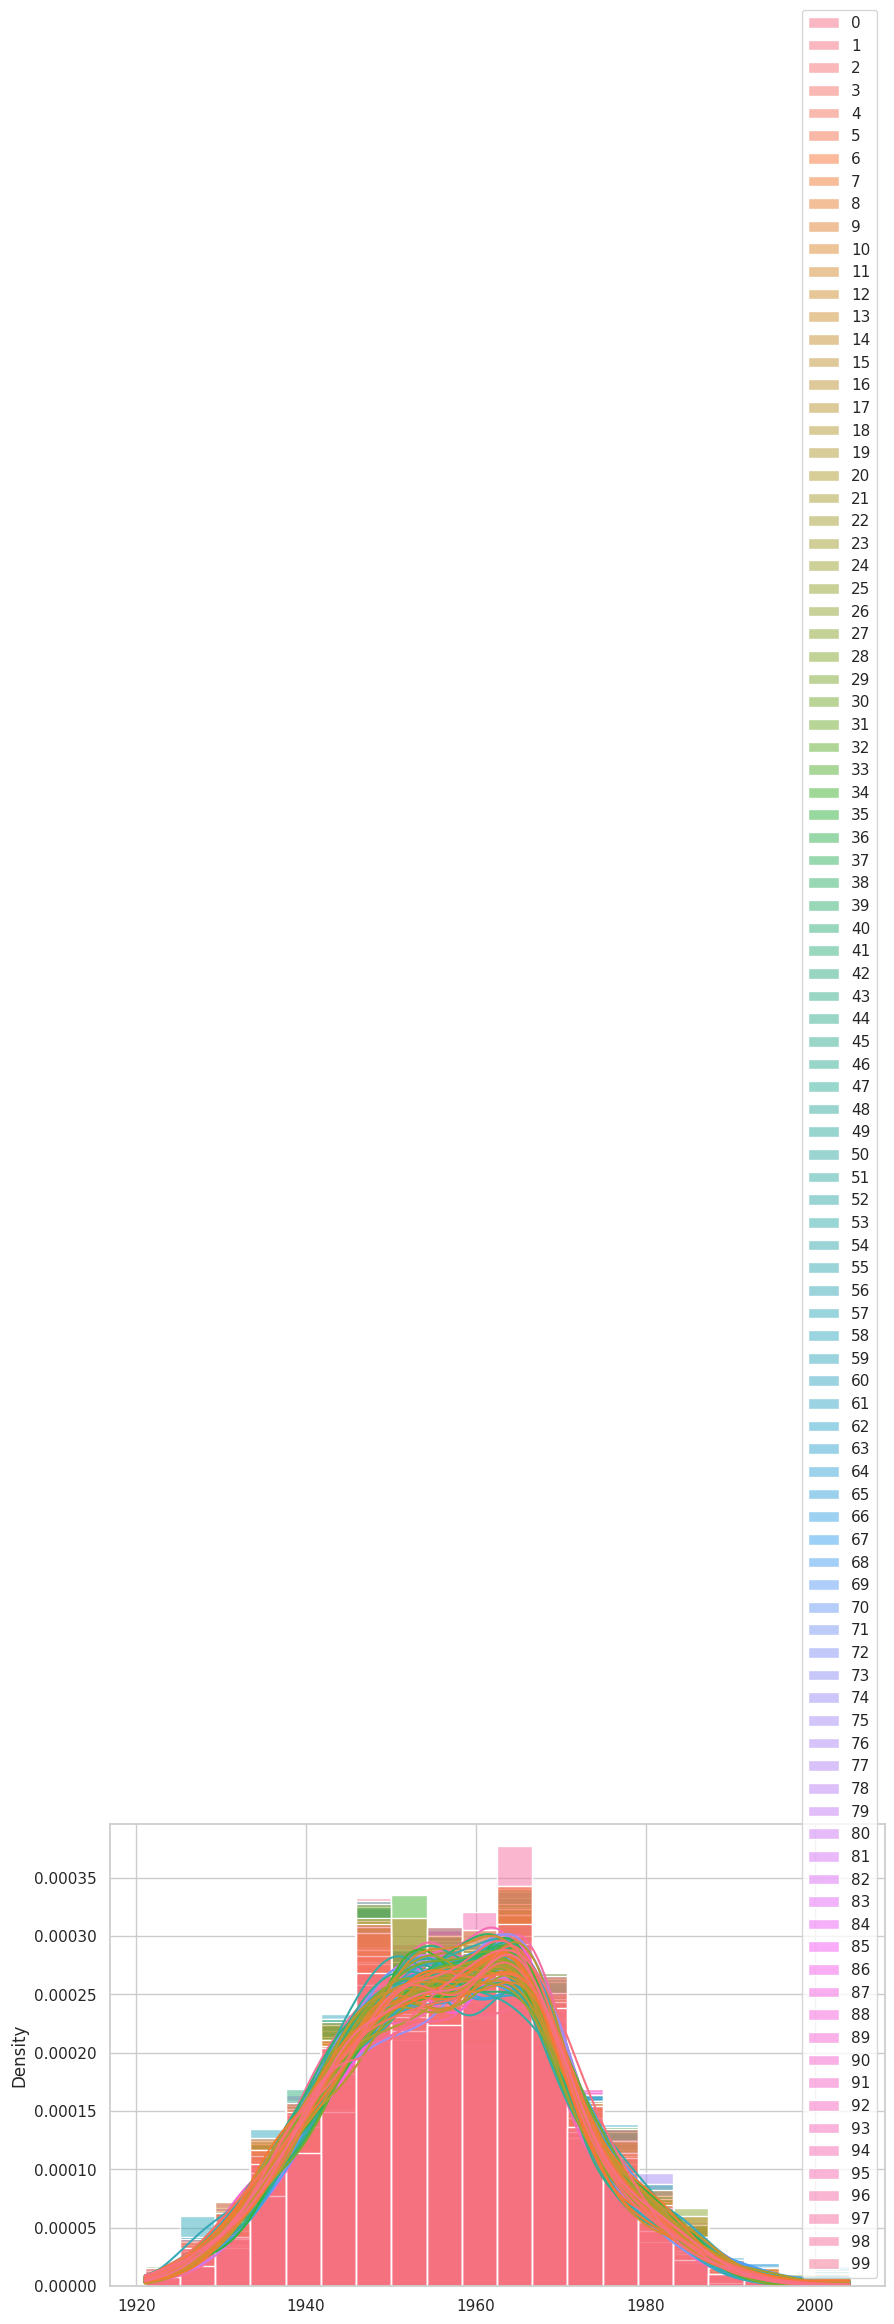

In [142]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança de Birth Year

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifica os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonda os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[1956.463277, 1957.828346], [1956.838078, 1958.227361], [1956.090905, 1957.447399], [1956.15711, 1957.542683], [1956.079263, 1957.493632], [1956.37101, 1957.742392], [1956.231316, 1957.645639], [1955.917884, 1957.266843], [1956.816768, 1958.234356], [1956.252585, 1957.639531], [1956.683285, 1958.066455], [1956.232342, 1957.616987], [1956.549267, 1957.872111], [1956.123317, 1957.501426], [1956.210891, 1957.595295], [1956.512066, 1957.93948], [1956.40685, 1957.757929], [1956.736481, 1958.129222], [1956.828734, 1958.175415], [1956.68747, 1958.061756], [1956.695701, 1958.116221], [1956.179319, 1957.585753], [1956.638738, 1958.015544], [1956.272503, 1957.68223], [1956.188806, 1957.571276], [1956.58684, 1957.984589], [1956.273349, 1957.67138], [1956.349779, 1957.765092], [1956.32521, 1957.680918], [1955.753883, 1957.099451], [1957.111504, 1958.503644], [1956.28165, 1957.641587], [1956.353792, 1957.756053], [1956.74159, 1958.109342], [1956.093283,

Distribuição amostral de Birth Month

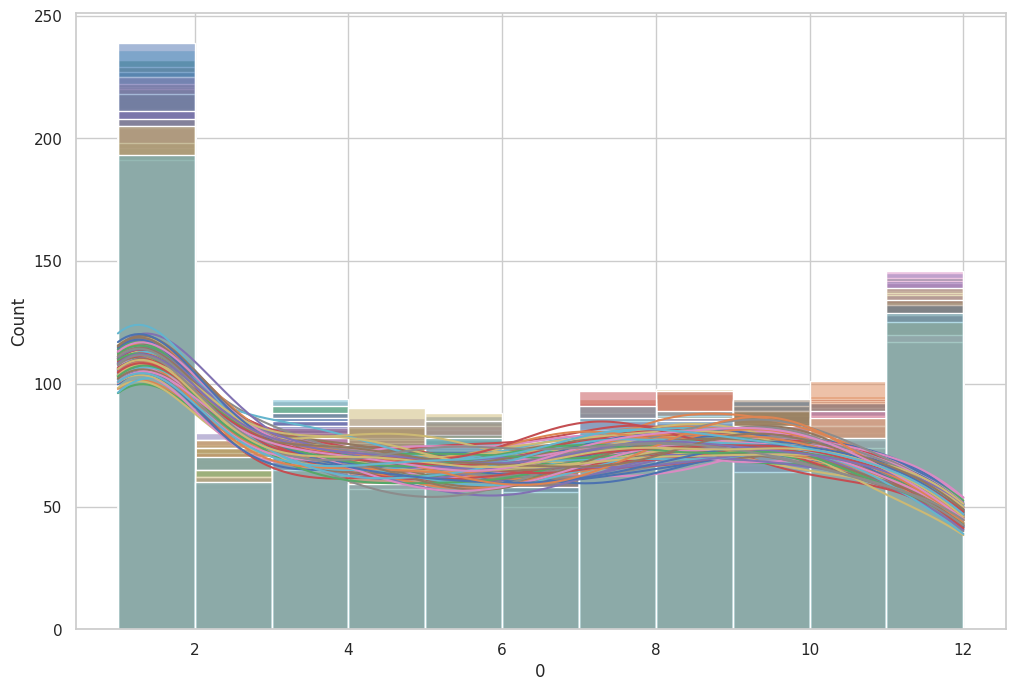

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'birthMonth'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gera amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converte as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configura o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

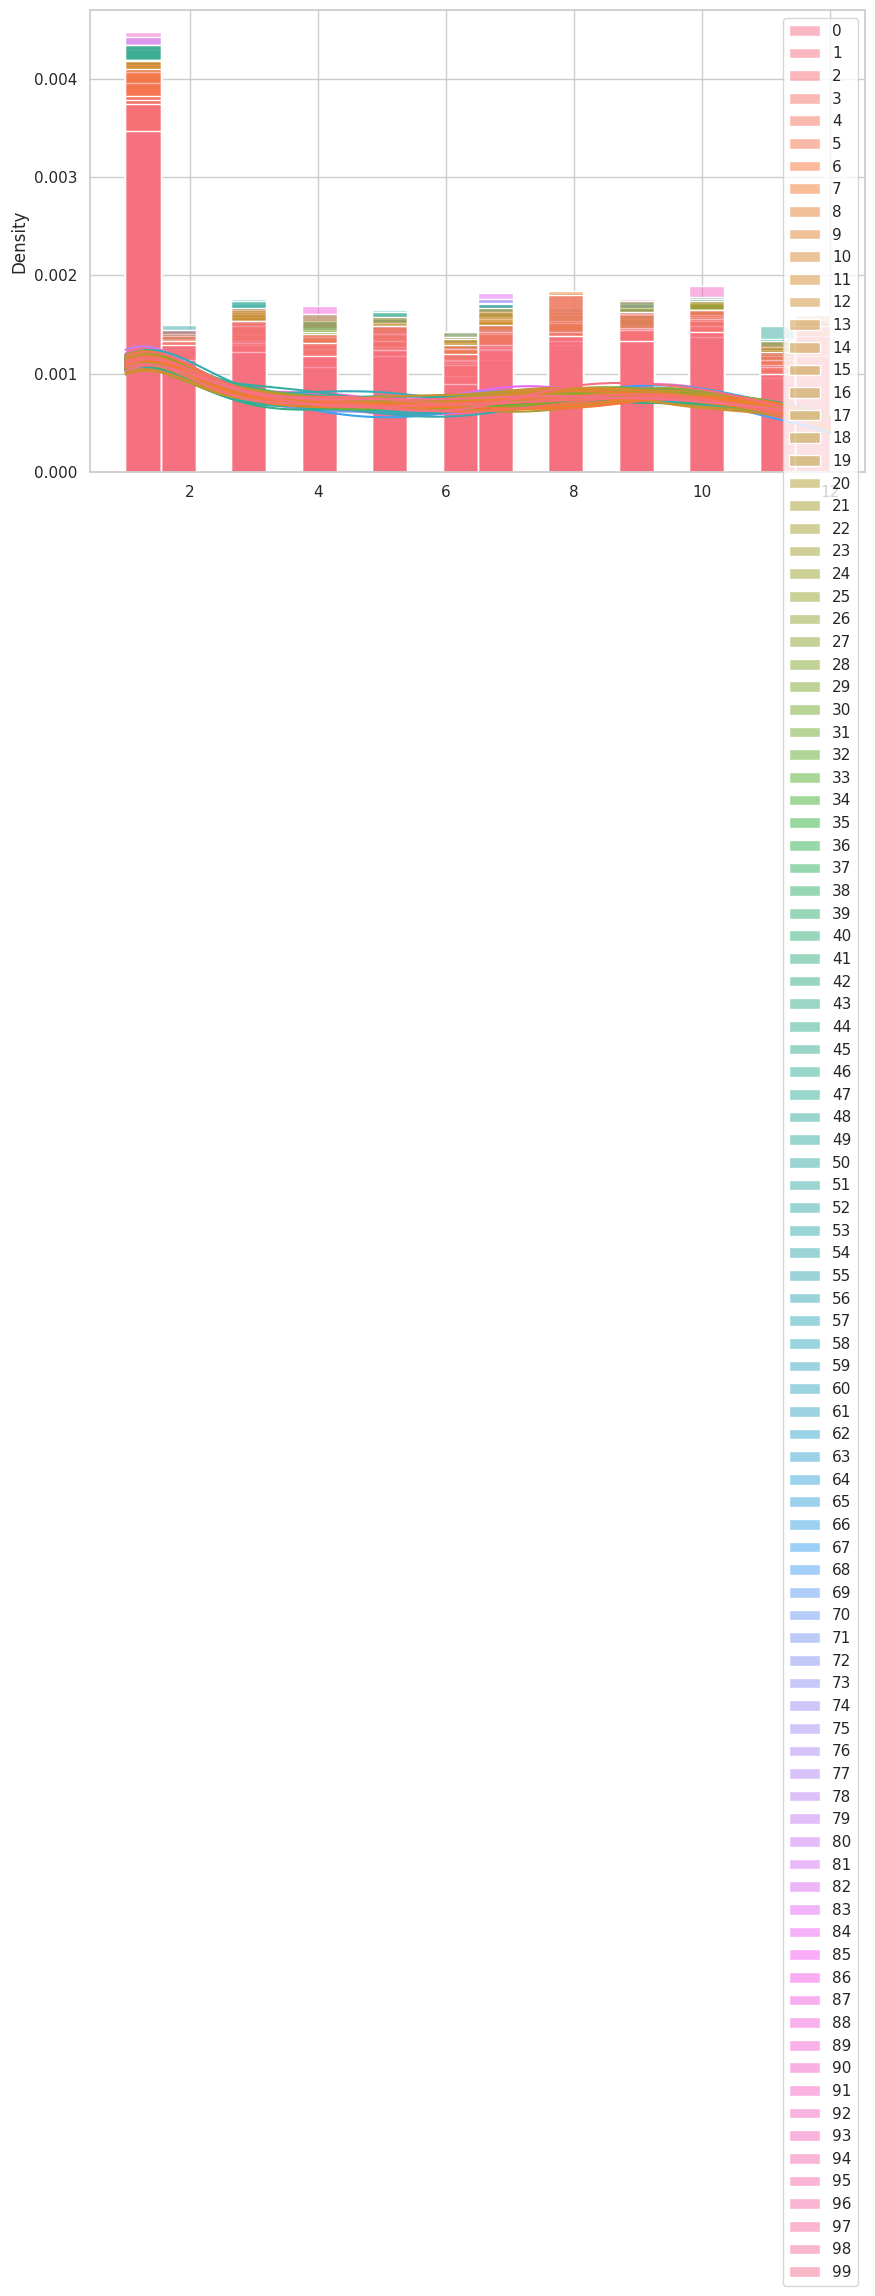

In [145]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança de Birth Month

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[5.636432, 6.018953], [5.737555, 6.123386], [5.538282, 5.927415], [5.440902, 5.820192], [5.392948, 5.783888], [5.497938, 5.883357], [5.60321, 6.00178], [5.471731, 5.867045], [5.504991, 5.8892], [5.573363, 5.959902], [5.468479, 5.862074], [5.700696, 6.078001], [5.736875, 6.117746], [5.459915, 5.833597], [5.477868, 5.857529], [5.660487, 6.042382], [5.637216, 6.022227], [5.449445, 5.834506], [5.376674, 5.76066], [5.57726, 5.954215], [5.577126, 5.970395], [5.565783, 5.945098], [5.475018, 5.858315], [5.499617, 5.878344], [5.63928, 6.02808], [5.539784, 5.918506], [5.622441, 6.008106], [5.473879, 5.862187], [5.761515, 6.144415], [5.637269, 6.026994], [5.524502, 5.906729], [5.476543, 5.867787], [5.52058, 5.906225], [5.439893, 5.82985], [5.689596, 6.076558], [5.467837, 5.853188], [5.632857, 6.023875], [5.38069, 5.766851], [5.577576, 5.957548], [5.532109, 5.91119], [5.669965, 6.063641], [5.612488, 5.996967], [5.617515, 6.008265], [5.680616, 6.067335]

Distribuição amostral do Produto Interno Bruto (PIB) do país do bilionário - gdp_Country

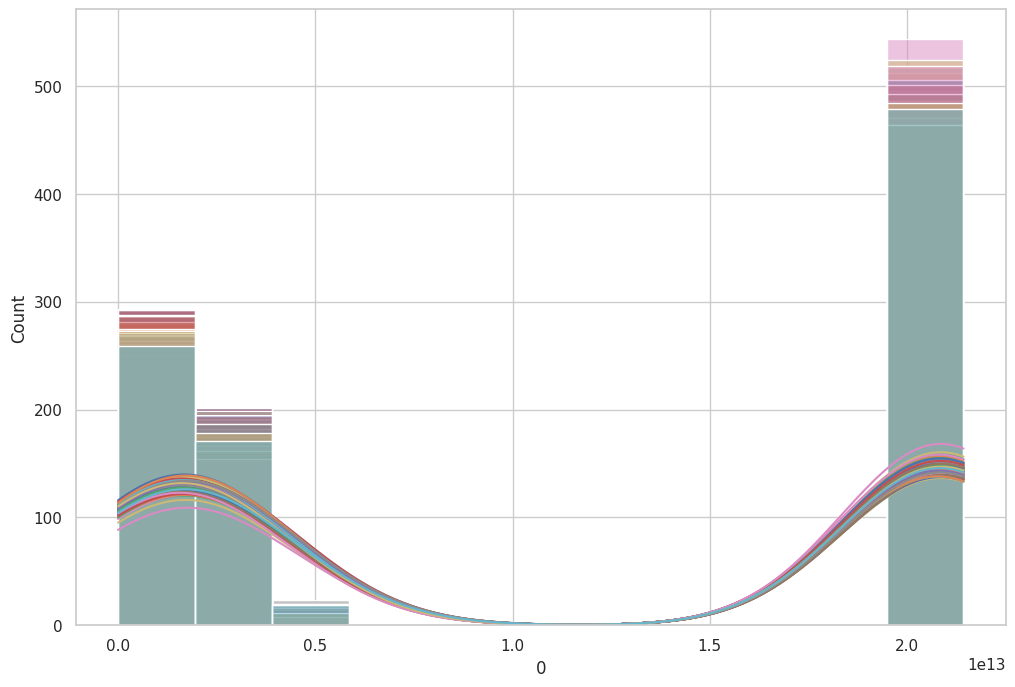

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'gdp_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

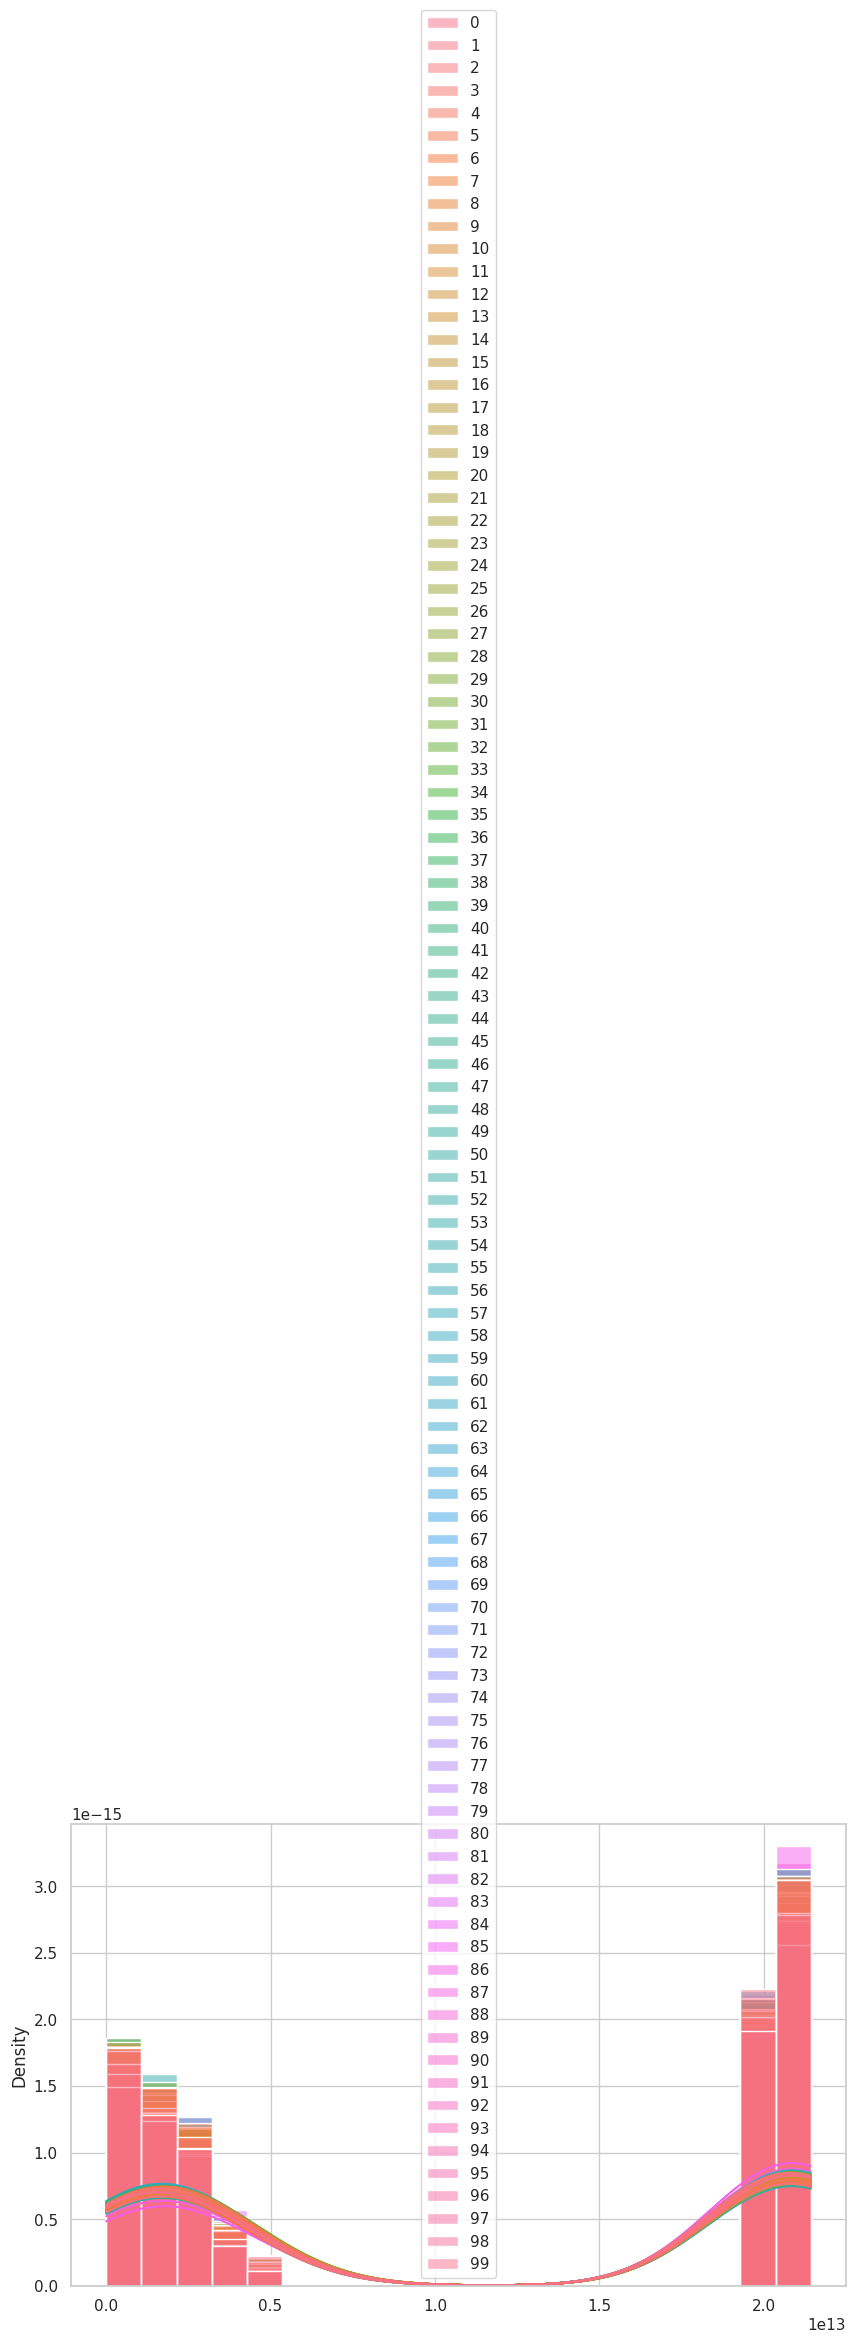

In [148]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança do Produto Interno Bruto (PIB) do país do bilionário - gdp_Country

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[11204703233288.602, 12208206688927.549], [11497647073584.139, 12485384208709.71], [10659223915597.713, 11653794112670.584], [11236617304368.414, 12231622753539.61], [10881487025276.885, 11879748555247.467], [10633384135874.799, 11627925947860.752], [11532487274199.898, 12531035212999.57], [10747372277430.79, 11743154621658.54], [11105520123880.646, 12110018017722.475], [11489352410860.133, 12483092091695.562], [11161196719236.08, 12157470281893.672], [11154248813280.545, 12150750456000.686], [10789361233647.797, 11784065891792.035], [11053689450371.803, 12059087683683.232], [11286217001824.498, 12278843556698.422], [11105511504578.805, 12102331234988.771], [10899051732602.078, 11894488940670.24], [10651592749850.775, 11645449943282.275], [11154224586353.824, 12154412193926.01], [11271742041410.547, 12269390479543.621], [11229914787423.45, 12224969703344.035], [11479788283281.508, 12475814974780.512], [11262245371705.246, 12253974202144.871

Distribuição amostral da Expectativa de vida no país do bilionário - lifeExpectancyCountry

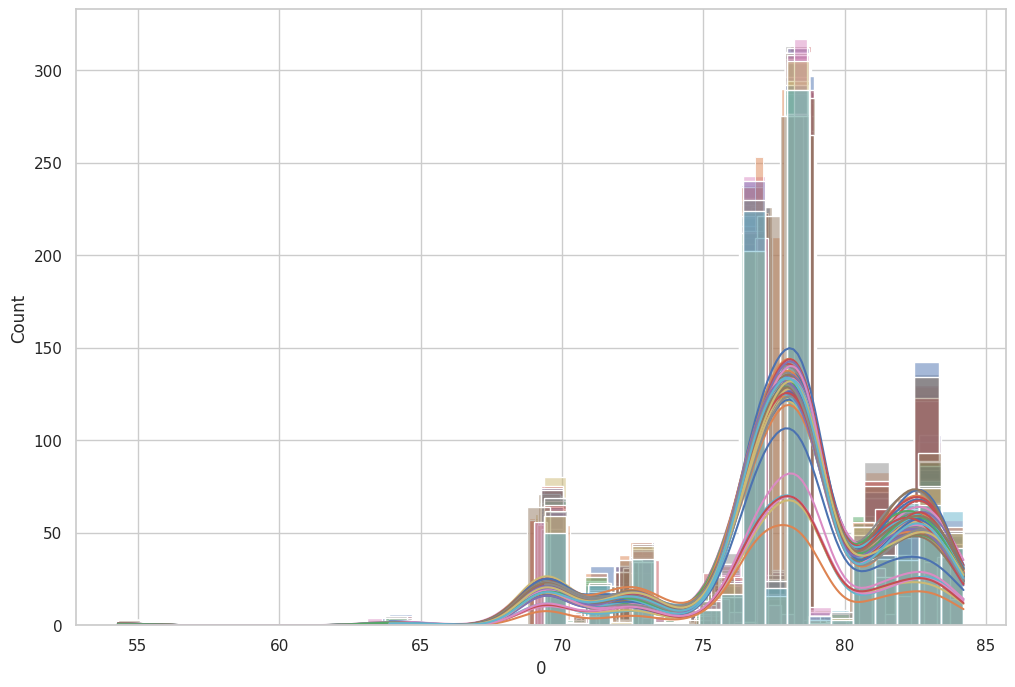

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'life_expectancy_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

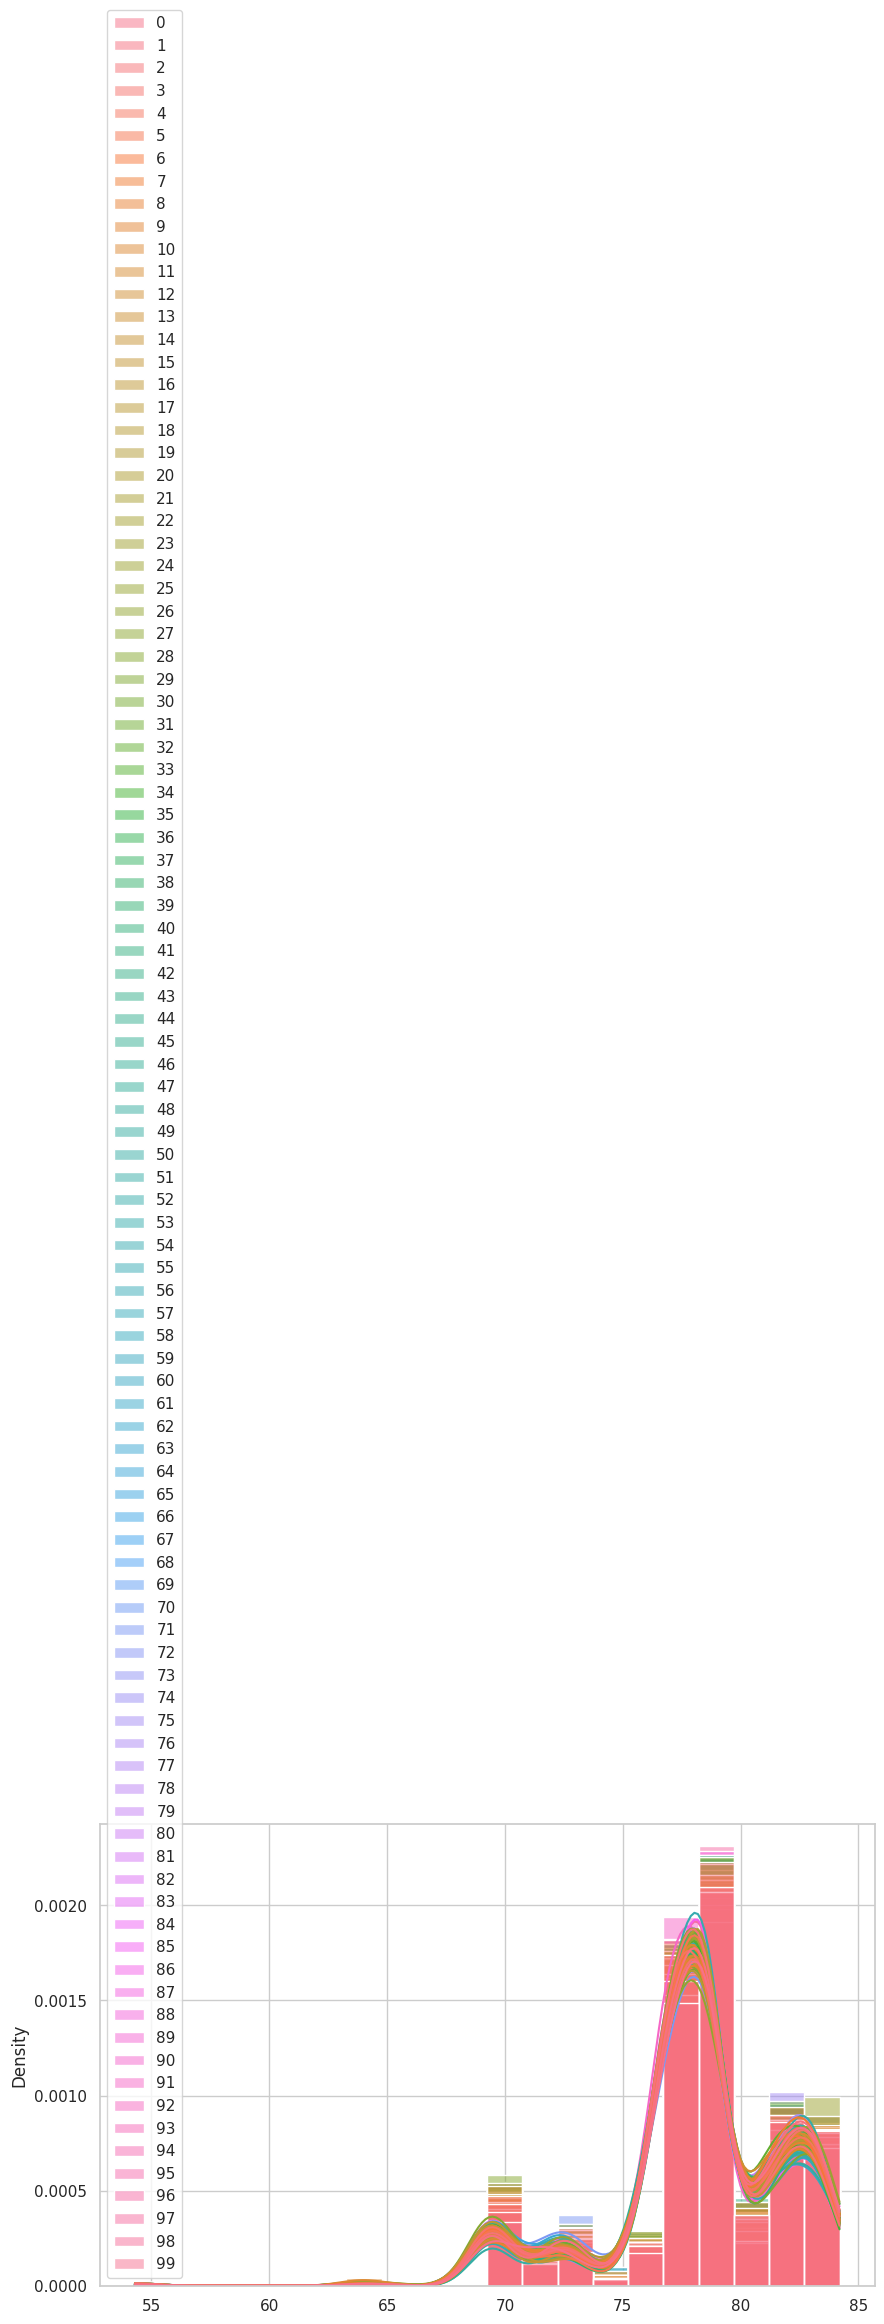

In [151]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança da Expectativa de vida no país do bilionário - lifeExpectancyCountry

In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[78.14036, 78.527827], [78.156408, 78.525995], [77.787692, 78.180562], [77.950771, 78.335874], [77.976643, 78.360709], [78.07516, 78.448905], [78.020924, 78.393161], [78.193598, 78.57555], [77.878464, 78.287557], [77.816726, 78.212213], [77.832002, 78.214052], [78.044007, 78.430749], [77.981699, 78.374544], [77.855681, 78.256604], [77.844715, 78.255501], [78.094425, 78.476417], [77.791846, 78.194764], [77.90138, 78.289607], [77.778235, 78.182704], [77.81826, 78.207969], [78.119769, 78.480017], [77.931989, 78.313262], [77.729556, 78.136826], [78.003773, 78.374194], [78.109131, 78.508169], [77.901788, 78.277655], [77.907061, 78.327825], [77.78274, 78.159601], [77.742292, 78.13977], [77.759601, 78.144008], [77.949949, 78.349185], [78.160453, 78.5221], [78.139009, 78.51663], [77.920822, 78.303672], [77.787713, 78.167866], [77.977814, 78.366342], [77.922826, 78.300918], [78.083259, 78.464502], [78.063714, 78.450079], [78.029585, 78.412336], [78.

Distribuição amostral da Receita tributária no país do bilionário - taxRevenueCountry

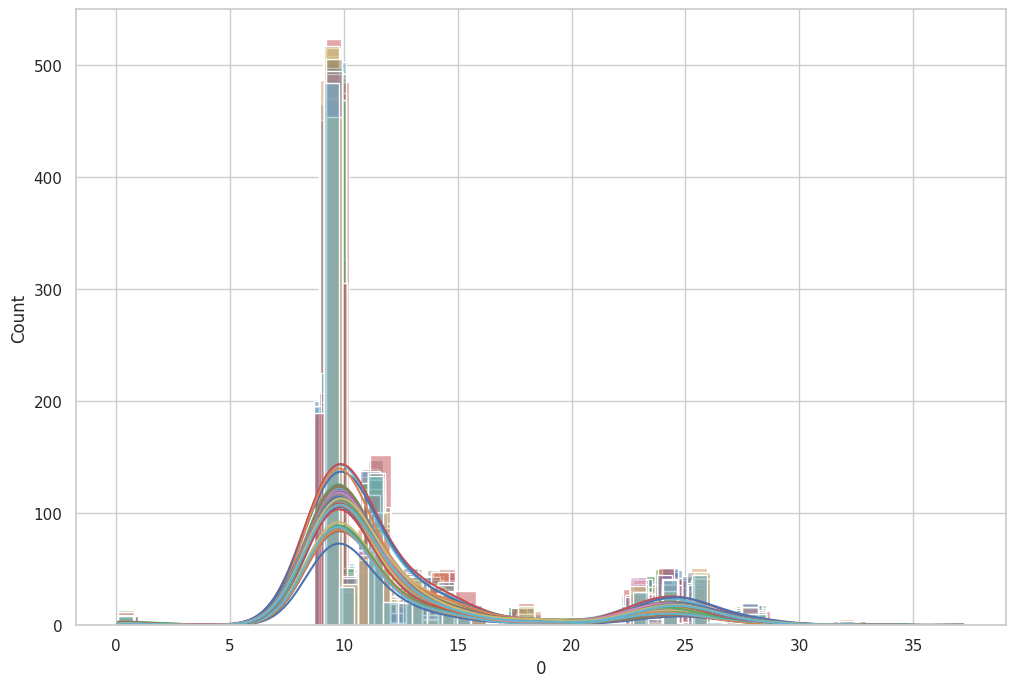

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'tax_revenue_country_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

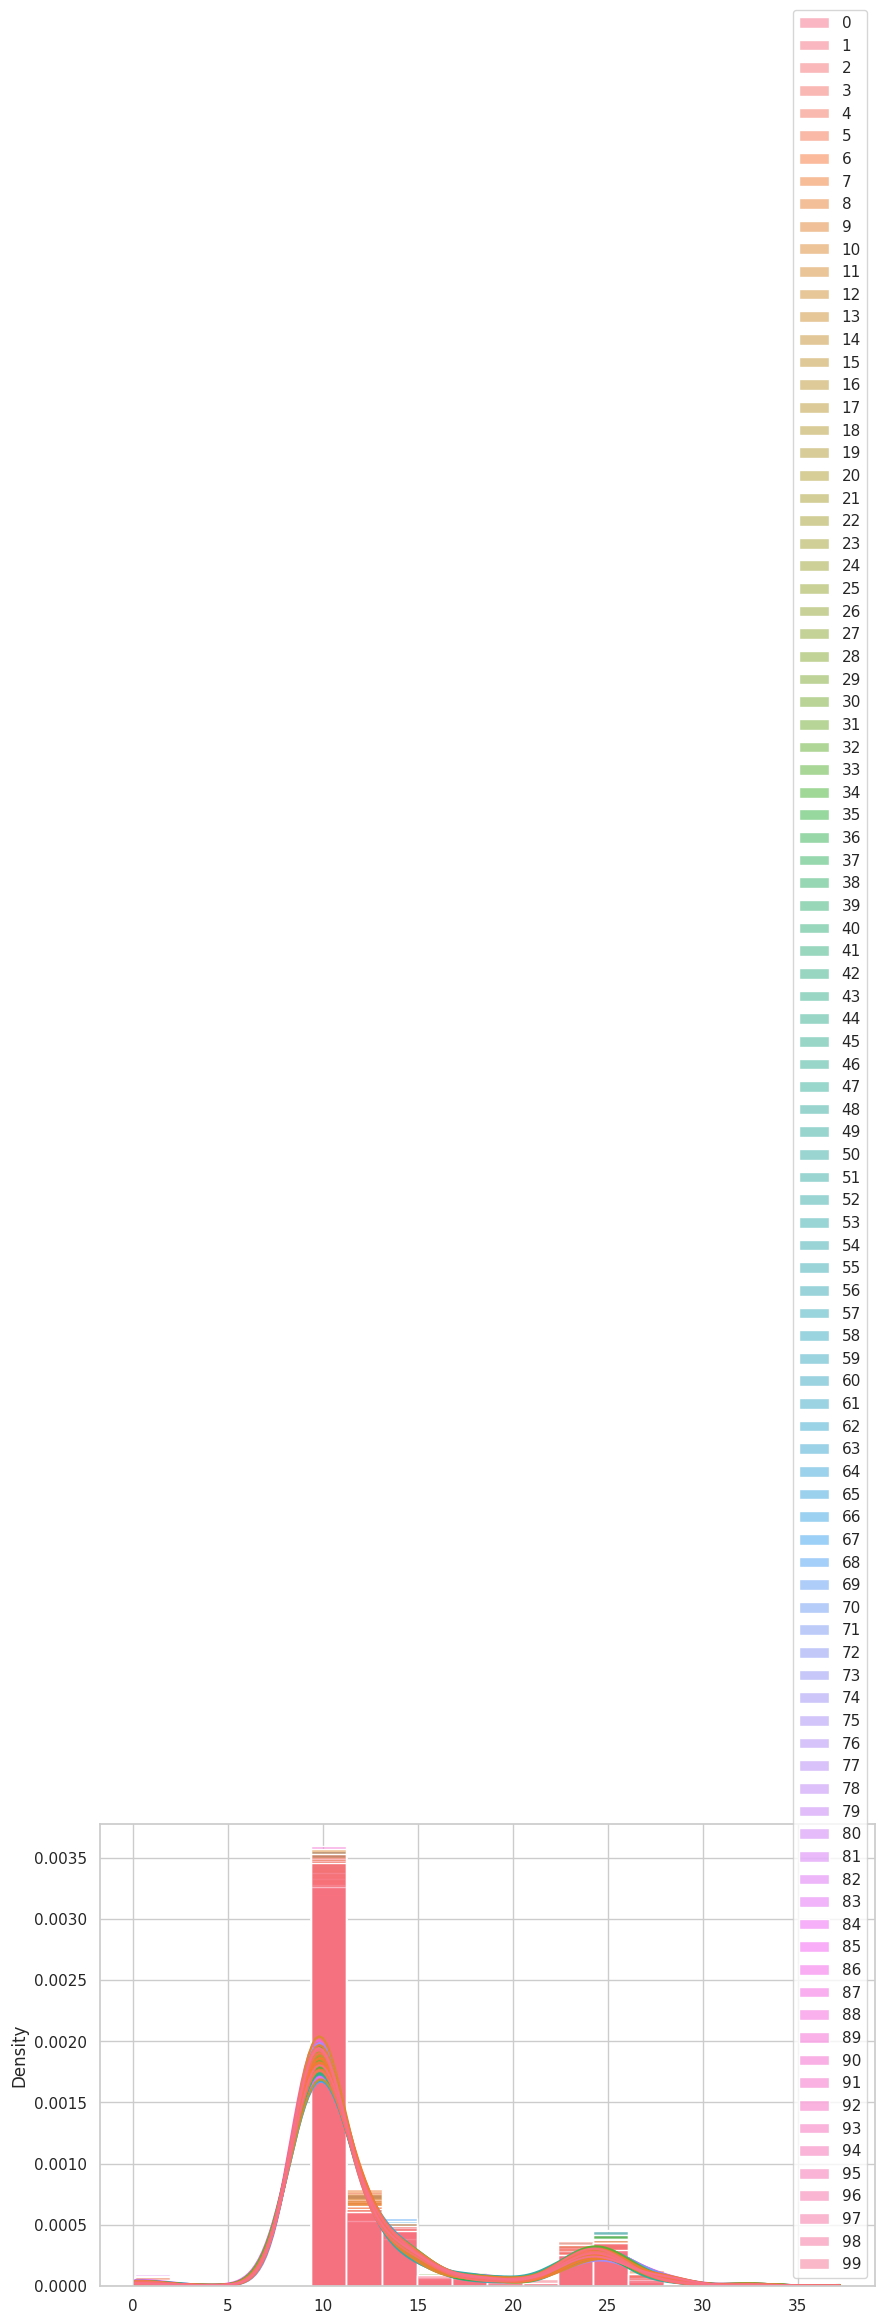

In [154]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança da Receita tributária no país do bilionário - taxRevenueCountry

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[12.148338, 12.686906], [12.308106, 12.856536], [12.243012, 12.797364], [12.064785, 12.608275], [12.354141, 12.923175], [12.300514, 12.838867], [12.285418, 12.848058], [12.09314, 12.638766], [12.506488, 13.070717], [12.042908, 12.580697], [11.81372, 12.340651], [12.289579, 12.842905], [12.184802, 12.734766], [12.224682, 12.763908], [12.191732, 12.759355], [12.366793, 12.938619], [12.188645, 12.742685], [12.555122, 13.141512], [12.396959, 12.954223], [12.244996, 12.817923], [12.385656, 12.949339], [12.199363, 12.745915], [12.098257, 12.636985], [12.251128, 12.817049], [12.250282, 12.796037], [12.207161, 12.767812], [12.253274, 12.801623], [12.286401, 12.837796], [12.111509, 12.653941], [12.090355, 12.635286], [12.243564, 12.807729], [12.334467, 12.905103], [12.477205, 13.068018], [12.216993, 12.771054], [12.427441, 13.015907], [12.063322, 12.608583], [11.968846, 12.514577], [12.375021, 12.943945], [12.098185, 12.641261], [12.156666, 12.70460

Distribuição amostral da População do país do bilionário - populationCountry

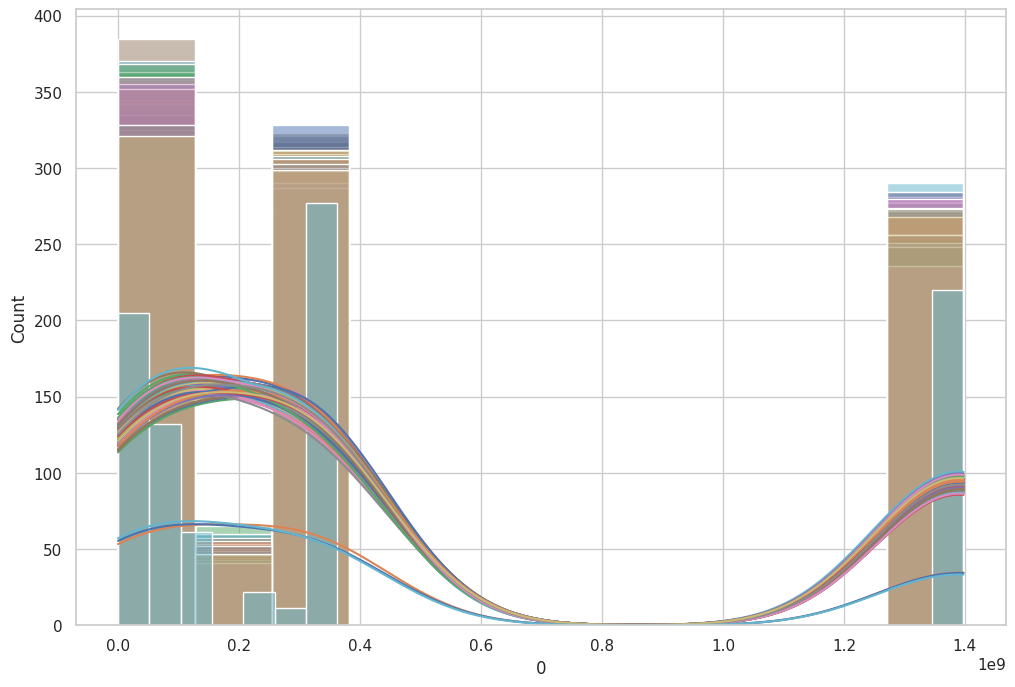

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'population_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

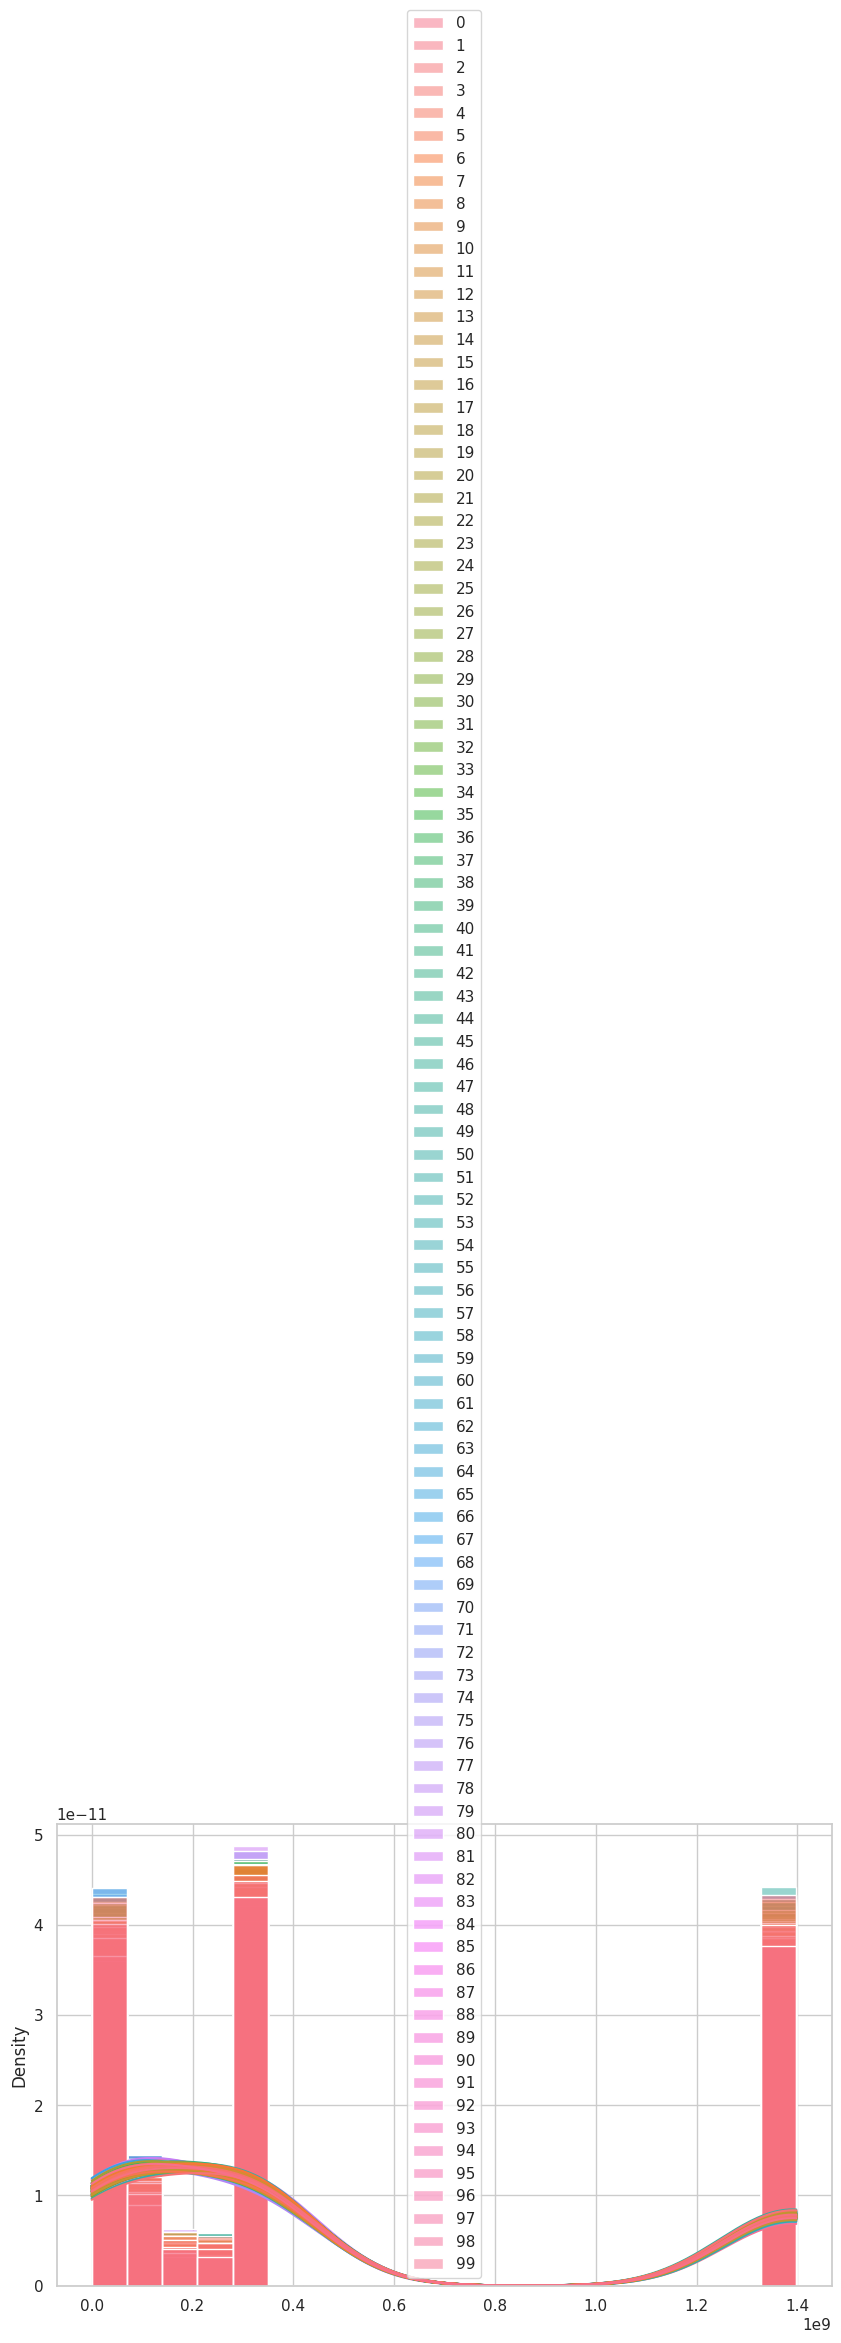

In [157]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança da População do país do bilionário - populationCountry

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[463600159.759568, 520741715.3149], [488622194.413998, 546301289.641262], [523139799.327878, 581953756.571802], [479500041.640359, 536709408.39372], [473887384.229182, 531143374.48844], [492991705.988323, 551320656.532195], [472554824.641108, 529035851.802629], [477895125.512368, 535656194.120329], [471343397.773613, 529003990.748312], [480905046.850819, 538488345.527904], [484464776.228953, 542518458.123235], [469201541.876152, 525952966.349111], [507418418.197313, 566534271.043408], [496799241.342181, 554590331.195132], [469997486.329278, 526809675.222519], [456752307.170795, 512721429.755408], [493989894.013732, 552006061.448055], [469597106.187446, 527486135.476384], [499913439.711102, 558674098.62116], [472159115.123622, 529508752.587896], [459701420.568301, 515949984.238048], [500348672.518966, 558738305.022656], [453882670.224486, 510885995.004481], [467065636.219811, 523703247.201186], [480193564.073418, 538069935.259915], [50133437

Distribuição amostral do Índice de Preços ao Consumidor (IPC) do país do bilionário - cpiCountry


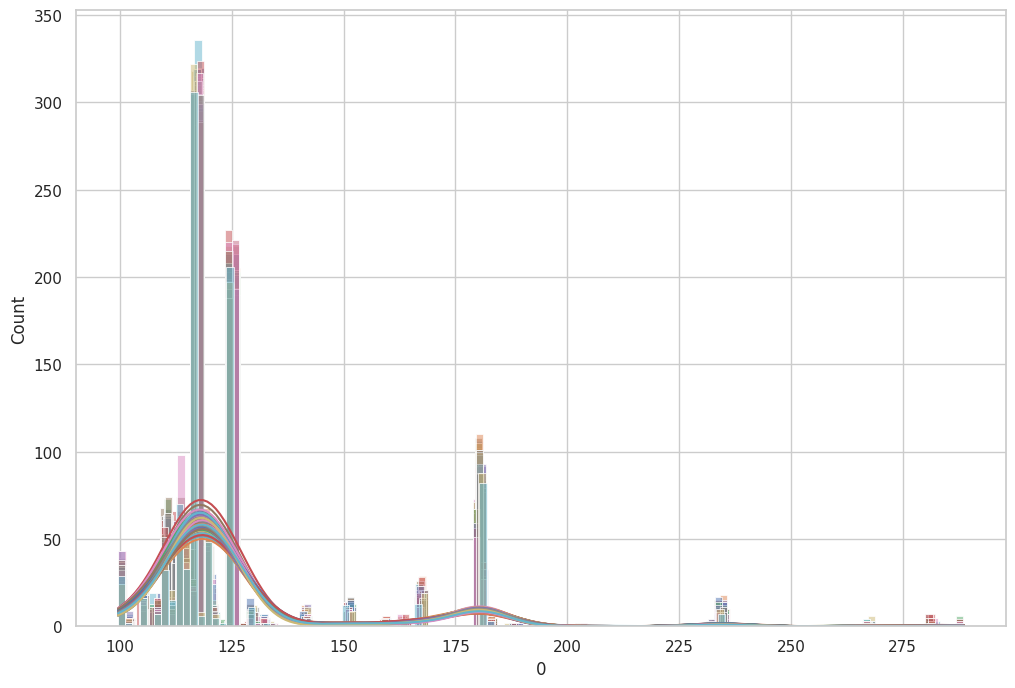

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'cpi_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

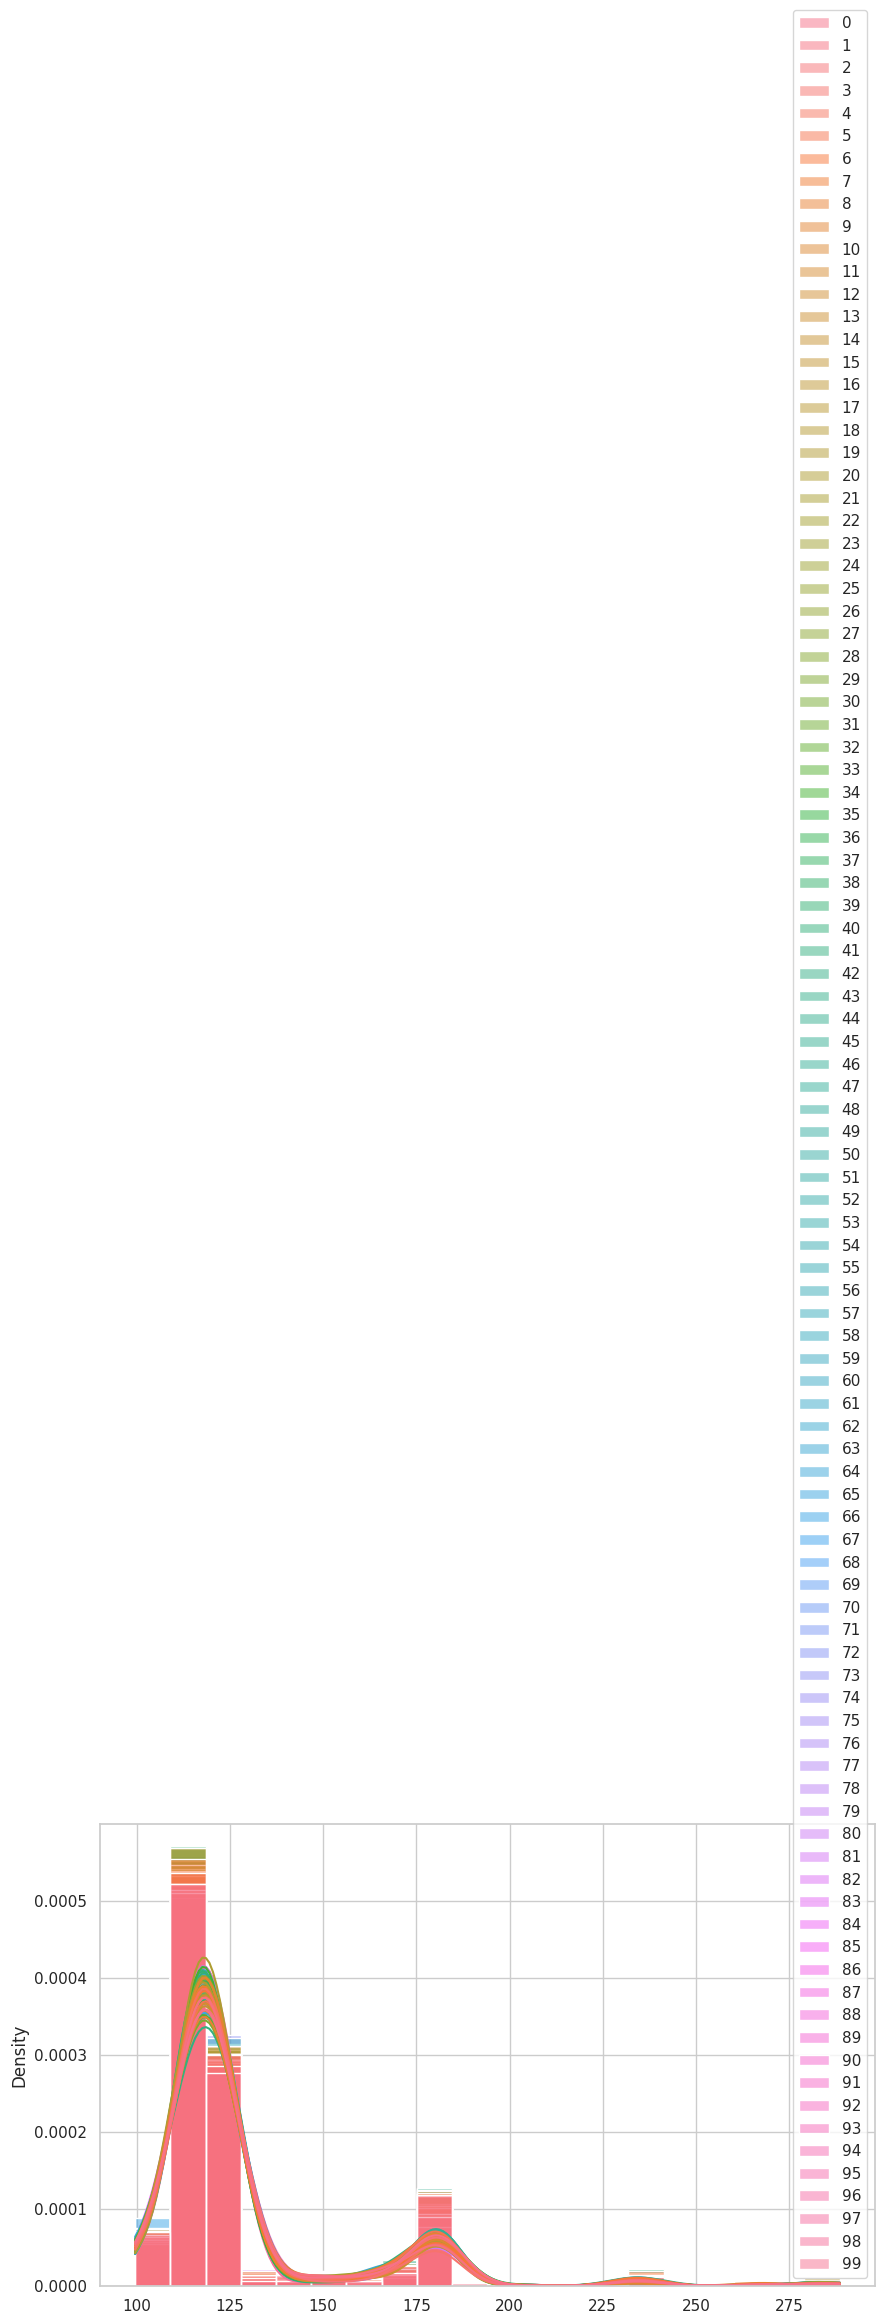

In [160]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança do Índice de Preços ao Consumidor (IPC) do país do bilionário - cpiCountry

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[127.440799, 130.337566], [126.14295, 128.872163], [127.347231, 130.306031], [125.427701, 128.129486], [125.846496, 128.55687], [127.532433, 130.25036], [126.808213, 129.698312], [125.487262, 128.064634], [128.240247, 131.175771], [125.594471, 128.135262], [125.471006, 128.104099], [126.84945, 129.708608], [127.142002, 129.927381], [125.209469, 127.904387], [126.910964, 129.718622], [126.199443, 128.861613], [125.955387, 128.742042], [125.838682, 128.509768], [127.383276, 130.401773], [125.372716, 128.112073], [124.793529, 127.271343], [125.79948, 128.406293], [126.070126, 128.812258], [127.006075, 129.763655], [126.488929, 129.123049], [125.249437, 127.765441], [125.137948, 127.692495], [125.596744, 128.185072], [126.210797, 128.817276], [128.281082, 131.258161], [125.385819, 128.018582], [126.883645, 129.647584], [126.475278, 129.196756], [127.108631, 130.041239], [124.654064, 127.115644], [126.762256, 129.568413], [125.890063, 128.483349

Distribuição amostral da alteração do IPC do país do bilionário - cpiChangeCountry

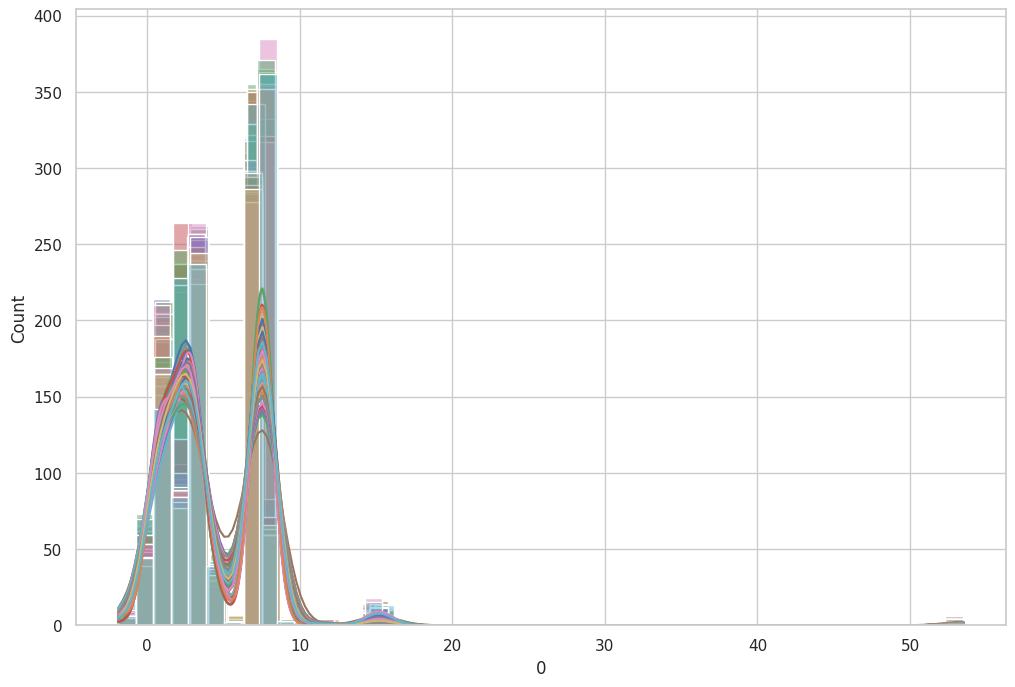

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'cpi_change_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

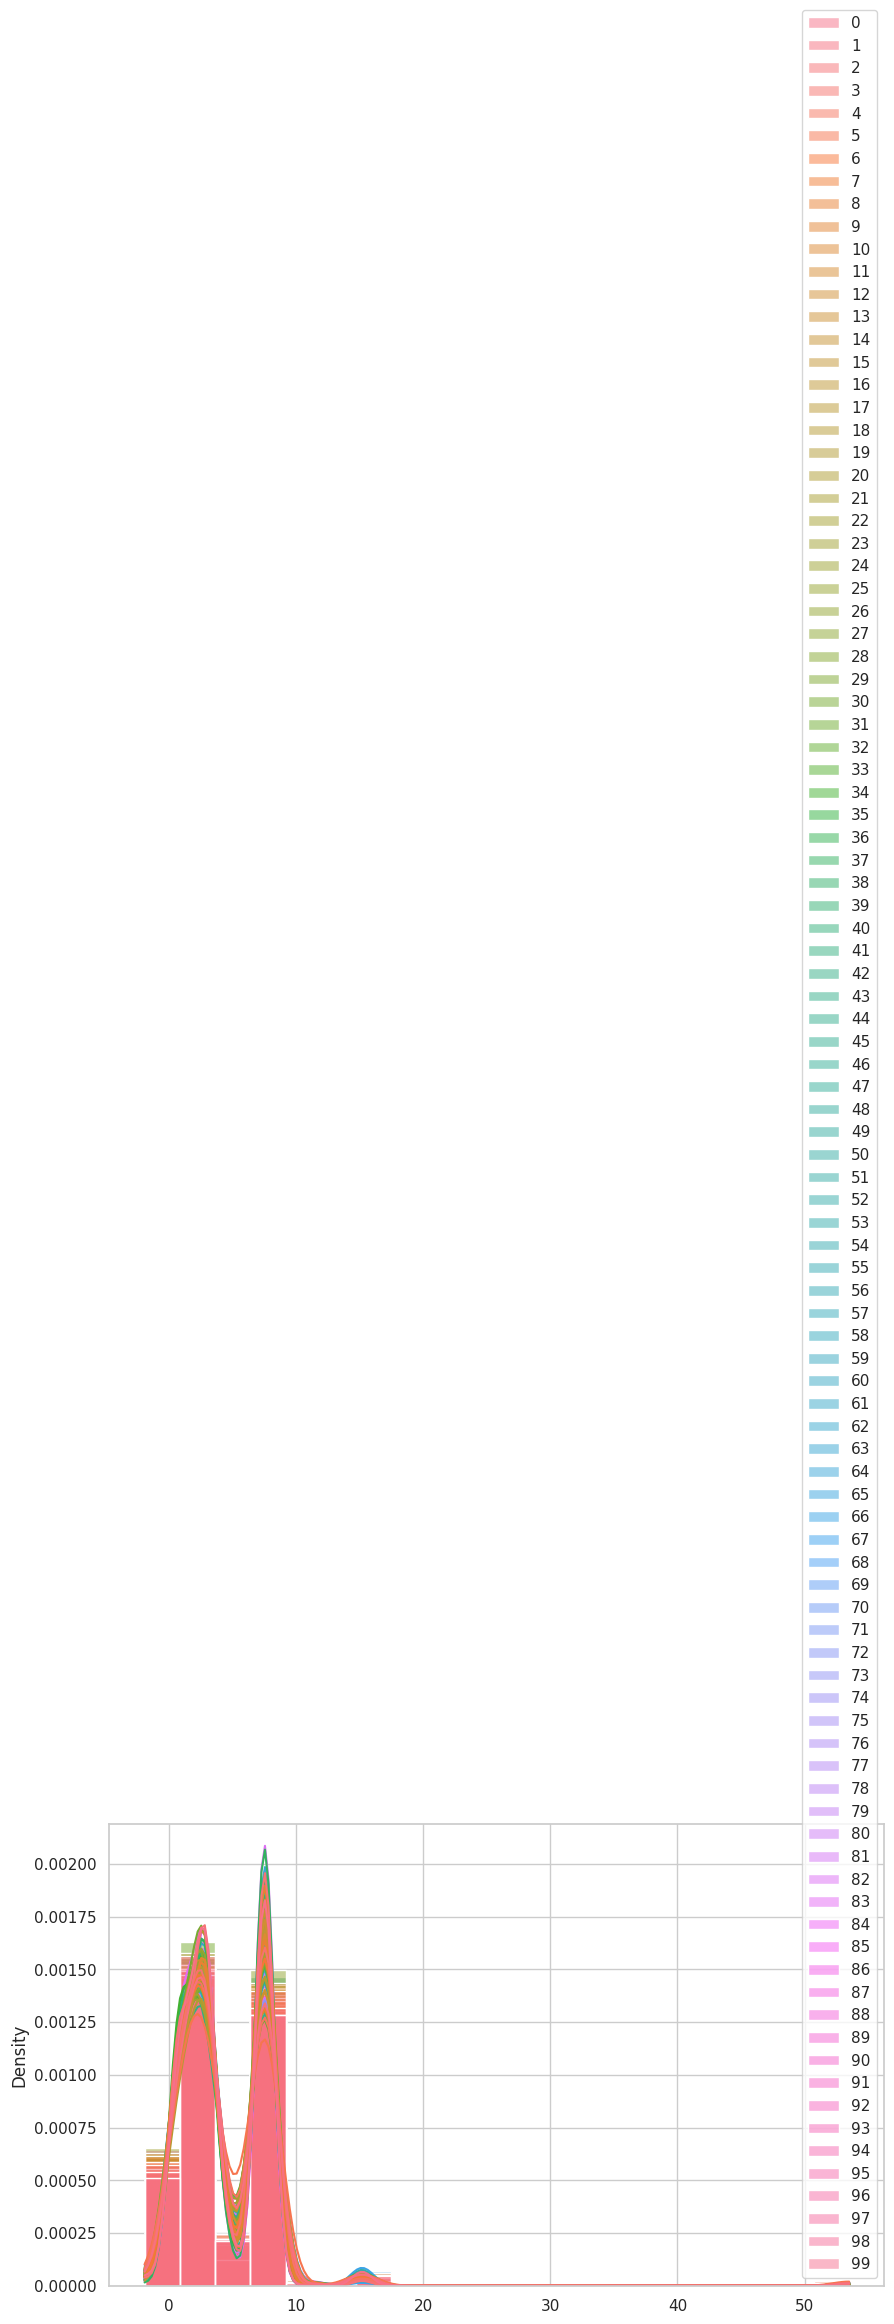

In [163]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança da alteração do IPC do país do bilionário - cpiChangeCountry

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[4.067082, 4.382918], [4.249666, 4.68201], [4.012909, 4.314929], [4.158626, 4.551148], [4.172353, 4.629572], [4.499402, 5.024428], [4.239835, 4.634207], [4.15913, 4.589677], [4.081911, 4.439074], [4.07228, 4.386963], [4.127371, 4.486078], [4.206365, 4.558657], [4.116555, 4.474003], [3.990785, 4.381717], [4.35317, 4.708252], [4.136872, 4.49279], [4.19458, 4.552258], [4.113633, 4.464946], [4.235478, 4.591015], [4.420686, 4.850979], [4.253095, 4.676819], [4.315001, 4.7755], [4.23159, 4.631261], [4.240796, 4.703204], [4.048188, 4.400408], [3.999772, 4.352734], [4.407928, 4.799479], [4.238922, 4.633147], [4.224492, 4.586499], [4.195449, 4.55262], [3.971962, 4.3215], [4.149146, 4.546983], [4.345084, 4.81474], [4.124934, 4.519823], [3.979502, 4.294572], [4.199694, 4.555426], [4.189527, 4.512632], [4.117254, 4.425995], [4.09879, 4.417877], [4.070543, 4.418705], [4.009881, 4.322737], [4.17259, 4.603768], [4.389585, 4.793962], [4.182133, 4.571713], [

Distribuição amostral de Matrícula no ensino superior no país do bilionário - grossTertiaryEducationEnrollment

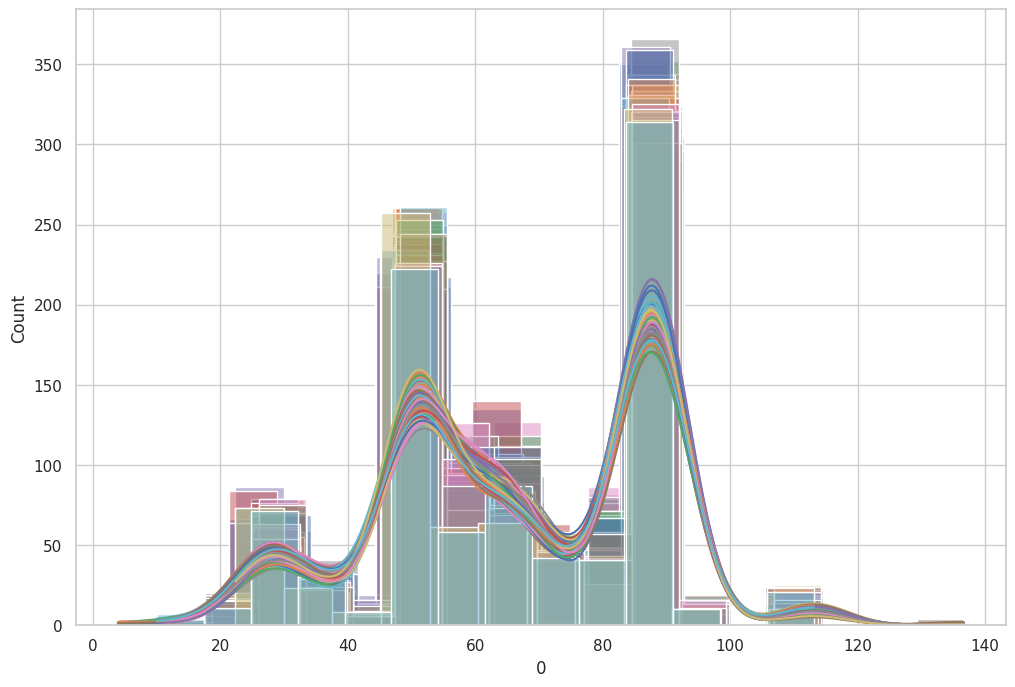

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'gross_tertiary_education_enrollment'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

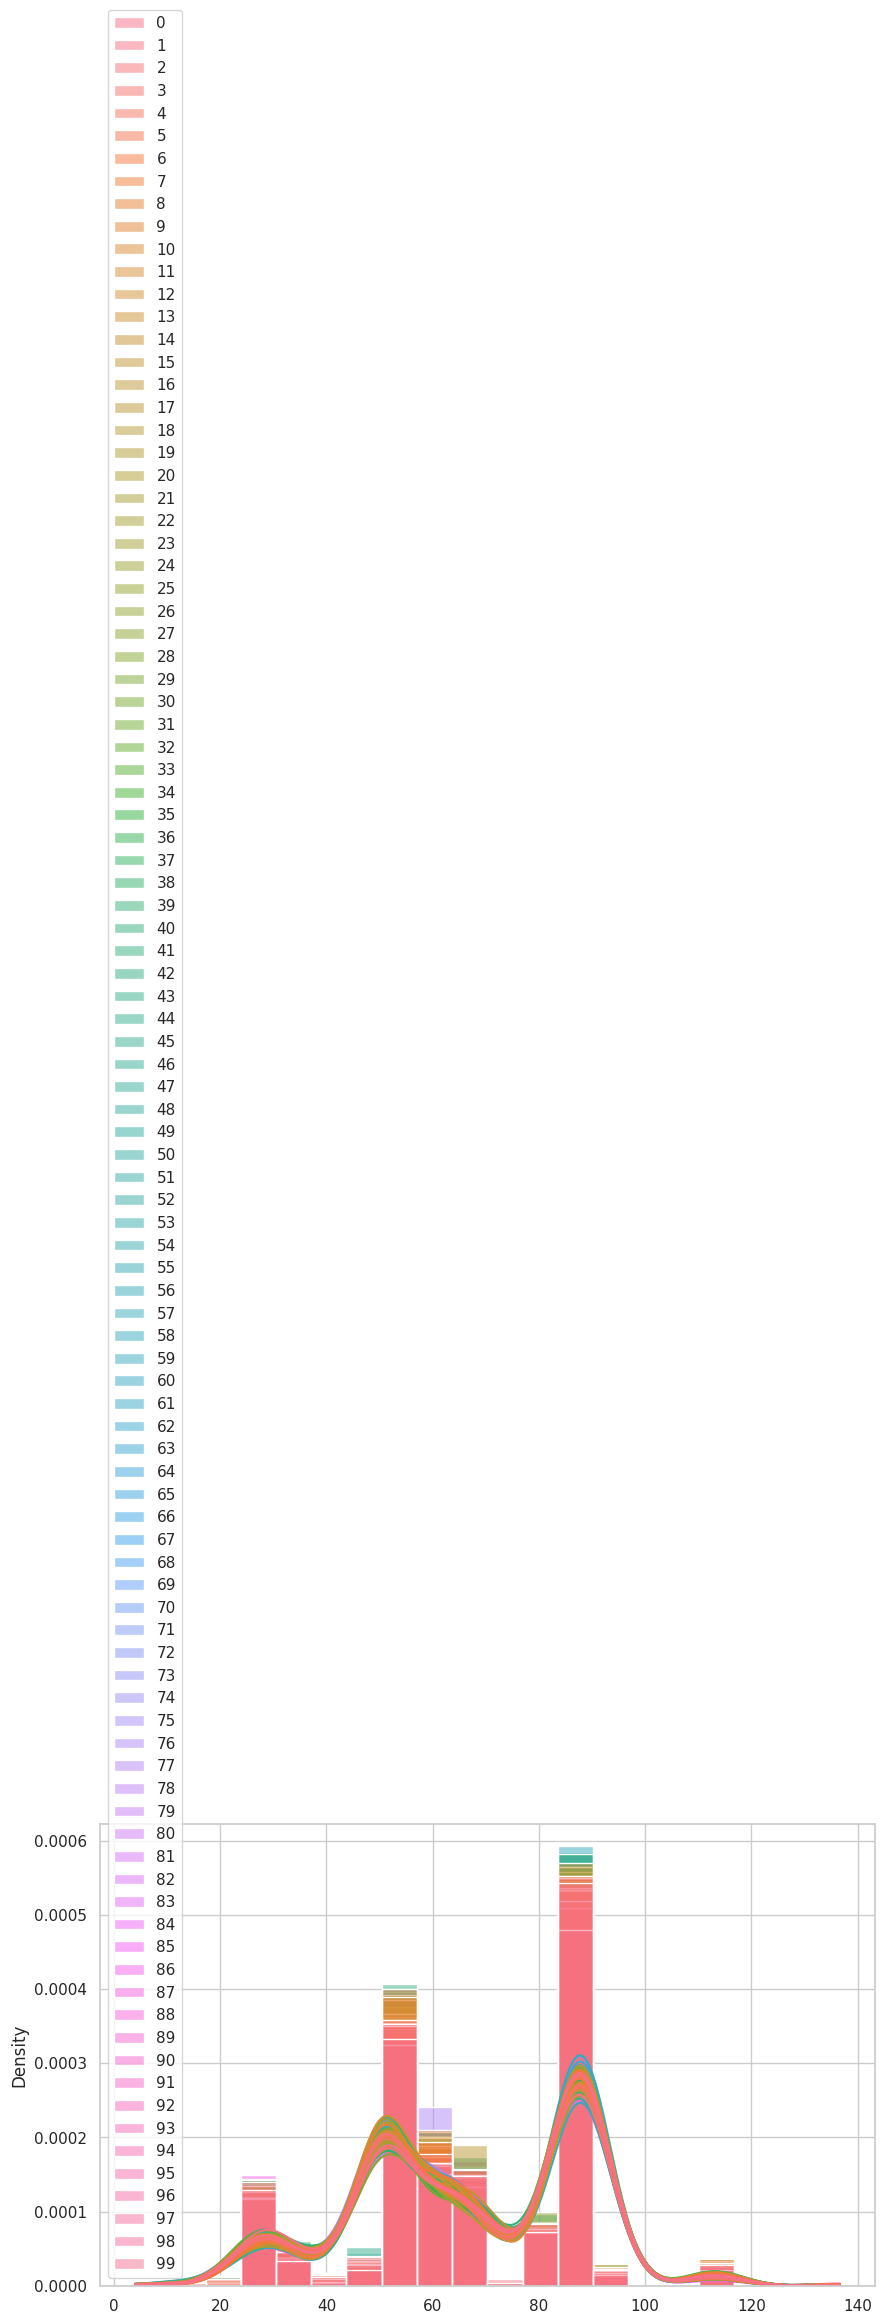

In [166]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança da Matrícula no ensino superior no país do bilionário - grossTertiaryEducationEnrollment

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[66.573555, 68.801204], [64.780186, 66.987382], [66.908711, 69.148767], [65.933306, 68.166042], [65.572158, 67.811158], [66.848163, 69.064992], [67.055937, 69.213776], [66.417772, 68.634143], [65.444859, 67.626185], [66.051211, 68.28743], [66.605557, 68.777523], [64.966737, 67.162213], [67.183636, 69.396878], [66.253969, 68.473673], [66.260968, 68.466149], [65.632559, 67.919433], [66.223313, 68.453543], [66.358955, 68.53791], [65.311511, 67.52832], [66.984756, 69.154599], [65.843754, 68.069364], [65.785428, 68.004821], [66.293405, 68.494612], [66.118944, 68.36407], [66.002872, 68.234803], [65.177763, 67.428668], [66.108867, 68.305586], [67.139589, 69.365347], [64.550801, 66.752625], [65.511854, 67.748772], [67.567383, 69.784814], [65.439342, 67.685126], [66.262135, 68.49306], [65.961967, 68.15549], [65.615833, 67.855857], [66.37965, 68.608841], [67.188047, 69.416857], [66.678254, 68.916416], [67.909409, 70.131589], [66.825255, 68.996583], [

Distribuiçã amostral da Matrícula no ensino primário no país do bilionário - grossPrimaryEducationEnrollmentCountry


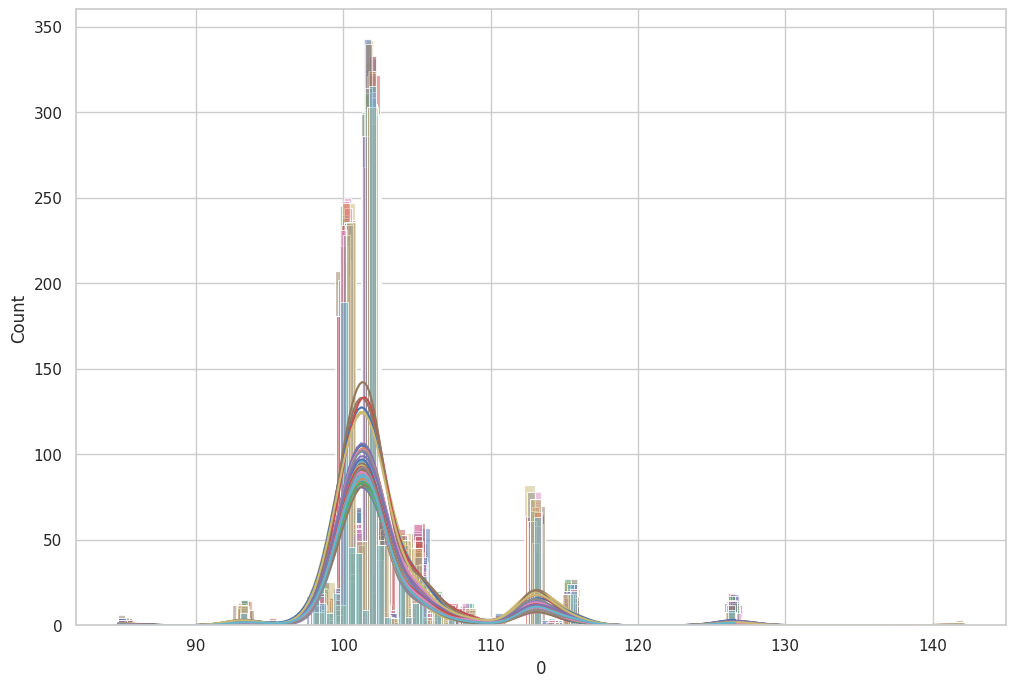

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'gross_primary_education_enrollment_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

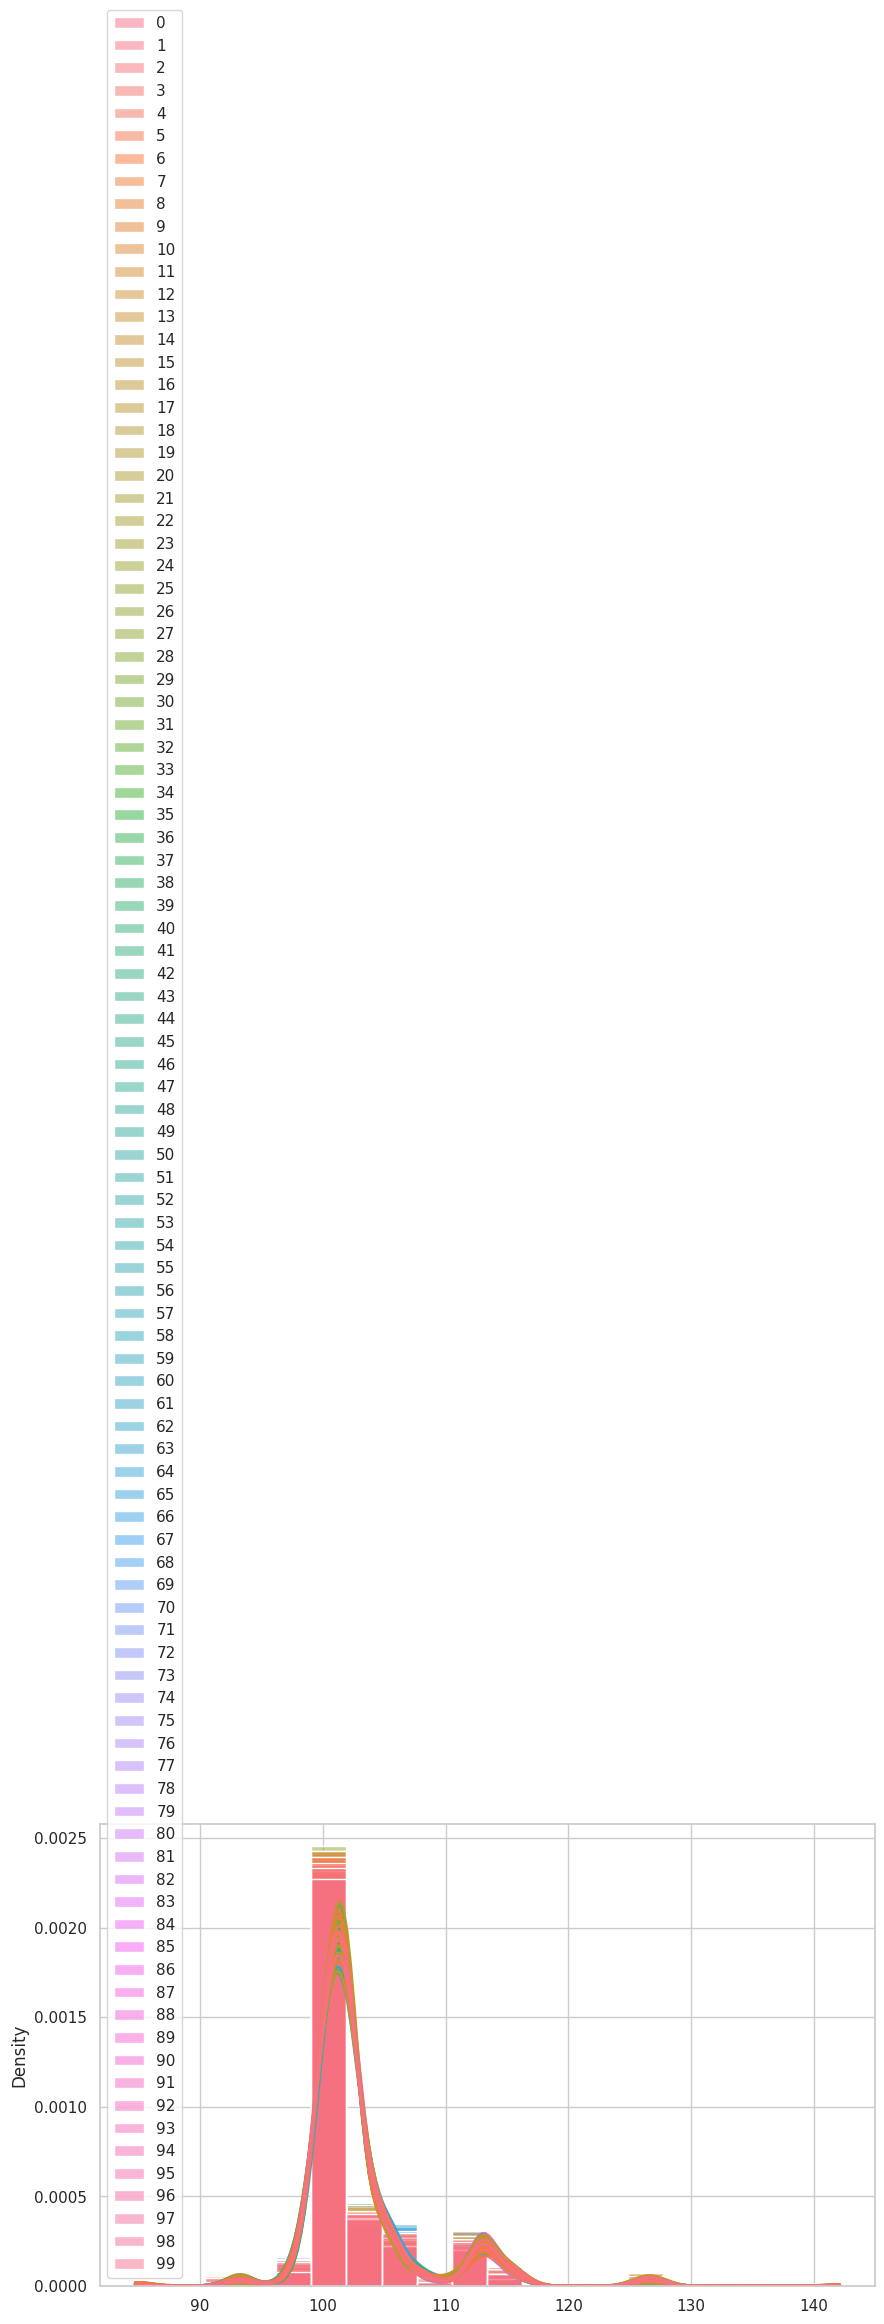

In [169]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança no ensino primário no país do bilionário - grossPrimaryEducationEnrollmentCountry

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[102.848587, 103.356608], [102.680517, 103.181251], [102.298224, 102.766998], [102.617095, 103.080445], [102.617383, 103.095184], [102.813115, 103.308458], [102.622088, 103.166669], [102.506983, 102.995168], [102.654211, 103.115661], [102.313964, 102.760499], [102.56324, 103.056802], [102.695579, 103.165527], [102.726793, 103.207545], [102.976264, 103.534751], [102.40979, 102.900555], [102.839709, 103.319812], [102.771622, 103.275436], [102.894317, 103.409648], [102.381162, 102.830466], [102.618572, 103.121646], [102.821315, 103.38143], [102.421841, 102.903433], [102.55729, 102.997089], [102.661938, 103.180212], [102.569007, 103.040701], [102.617584, 103.089544], [102.366269, 102.841603], [102.769902, 103.305501], [102.952084, 103.507199], [102.39829, 102.837901], [102.43743, 102.894755], [102.653191, 103.108878], [102.654243, 103.131211], [102.288143, 102.771148], [102.67353, 103.16494], [102.41345, 102.856647], [102.741495, 103.239971], [

Distribuição amostral da Alíquota total de impostos no país do bilionário - (totalTaxaCountry)


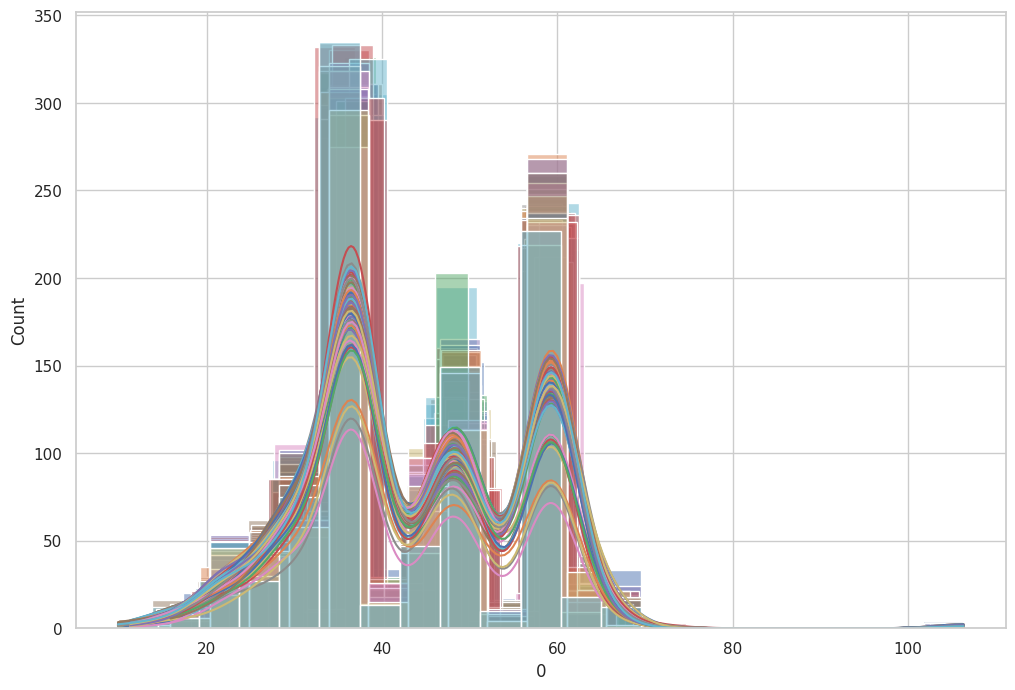

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#variável de interesse
variable_of_interest = 'total_tax_rate_country'

# Tamanho da amostra desejado
sample_size = 100

# Número de amostras
num_samples = 1000

# Gere amostras da população
samples = [bili[variable_of_interest].sample(sample_size).tolist() for _ in range(num_samples)]

# Converta as amostras em um DataFrame
samples_df = pd.DataFrame(samples)

# Configure o estilo seaborn
sns.set(style="whitegrid")

# Visualização da distribuição amostral
plt.figure(figsize=(12, 8))
for col in samples_df.columns:
    sns.histplot(samples_df[col], kde=True, label=f'Sample {col}')


# Estatísticas descritivas para cada amostra
descriptive_stats = samples_df.describe()

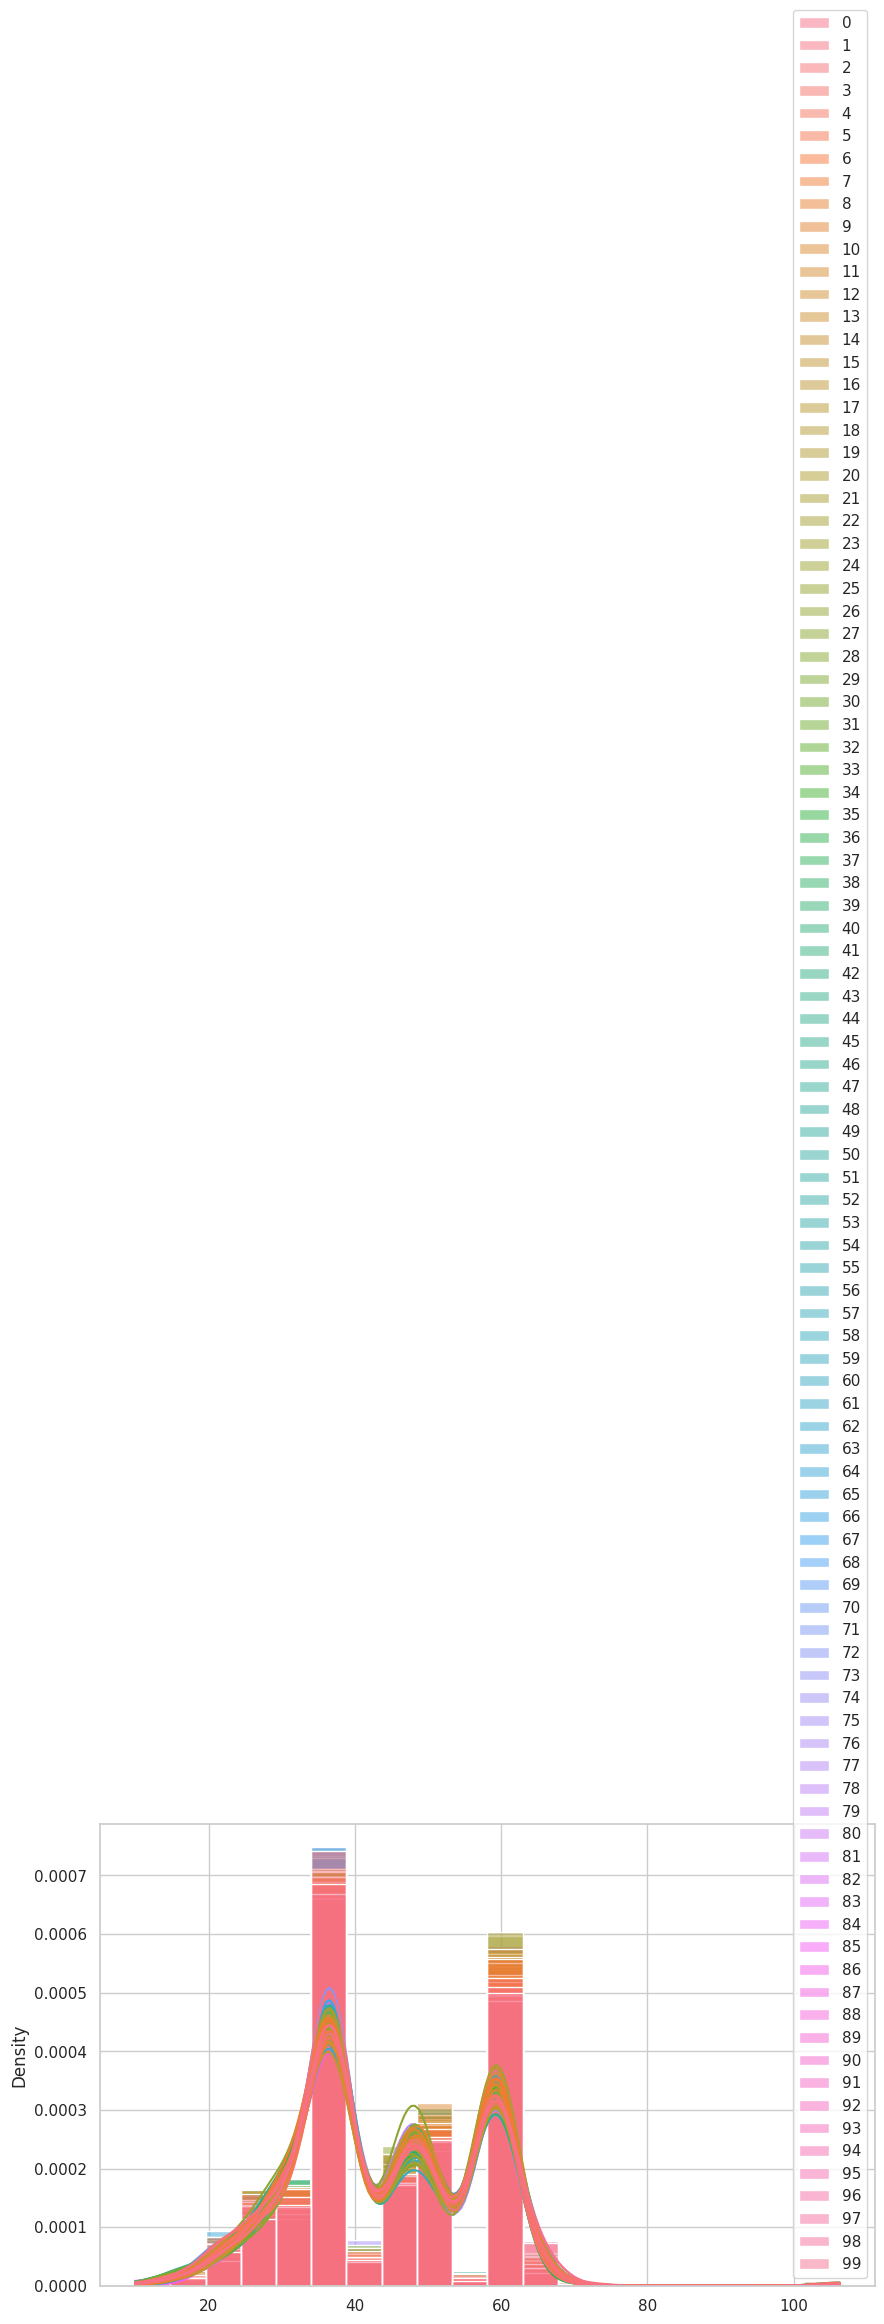

In [172]:
# Ajustar o tamanho da figura para evitar consumo excessivo de memória
plt.figure(figsize=(10, 6))

# Plotar o histograma com kernel density estimation (KDE)
sns.histplot(samples_df, kde=True, bins=20, color='skyblue', stat='density')

# Mostrar o gráfico
plt.show()

Intervalo de confiança da Alíquota total de impostos no país do bilionário - (totalTaxaCountry)

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Especifique os níveis de confiança desejados
nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

intervalos_confianca_90 = []
intervalos_confianca_95 = []

for col in samples_df.columns:
    amostra = samples_df[col]
    media_amostra = np.mean(amostra)
    desvio_padrao_amostra = np.std(amostra, ddof=1)

    intervalo_confianca_90 = stats.norm.interval(nivel_confianca_90, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)
    intervalo_confianca_95 = stats.norm.interval(nivel_confianca_95, loc=media_amostra, scale=desvio_padrao_amostra/len(amostra)**0.5)

    # Arredonde os valores para dois dígitos decimais
    intervalo_confianca_90 = [round(val, 6) for val in intervalo_confianca_90]
    intervalo_confianca_95 = [round(val, 6) for val in intervalo_confianca_95]

    intervalos_confianca_90.append(intervalo_confianca_90)
    intervalos_confianca_95.append(intervalo_confianca_95)

# Exiba os resultados
print(f"Intervalos de Confiança de 90% para a Média: {intervalos_confianca_90}")
print(f"Intervalos de Confiança de 95% para a Média: {intervalos_confianca_95}")

Intervalos de Confiança de 90% para a Média: [[43.722808, 45.006327], [42.770029, 44.057713], [42.660754, 43.866325], [43.643717, 44.949087], [43.196537, 44.47657], [43.019152, 44.281708], [43.715421, 44.973444], [43.049319, 44.331148], [43.592563, 44.821585], [43.829168, 45.07094], [43.82285, 45.064596], [43.861095, 45.145933], [44.005911, 45.259688], [43.855173, 45.060639], [43.229978, 44.535286], [42.526747, 43.789348], [43.479543, 44.72684], [43.717666, 44.974101], [43.153532, 44.42815], [43.155248, 44.414308], [43.575086, 44.852633], [43.879787, 45.152871], [42.842349, 44.082869], [43.19934, 44.450768], [43.903126, 45.193345], [43.805358, 45.077832], [42.383052, 43.667377], [43.071613, 44.283425], [44.098155, 45.370669], [43.124738, 44.334225], [43.142885, 44.422854], [43.492376, 44.758211], [43.766482, 45.047199], [43.427114, 44.713404], [43.292653, 44.550872], [42.893868, 44.133405], [43.442868, 44.707614], [43.211396, 44.471648], [43.32438, 44.596571], [42.729556, 44.011633], [